In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Loading data

In [77]:
#Insert the path for the input csv file
df = pd.read_csv('YOUR_PATH_TO_INPUT_FILE/InputData.csv')


In [78]:
df;


# Defining input and output variables

Y = Target/Output Variable $\rightarrow$ Responsivity  &  X = Input Variables 

In [79]:
y = df['Res(A/W)']
y;

In [80]:
# Check for NaN values
nan_count = y.isna().sum()
print(f"Number of NaN values: {nan_count}")

# Locations of NaN values
nan_locations = y[y.isna()]
print("Locations of NaN values:\n", nan_locations)


Number of NaN values: 0
Locations of NaN values:
 Series([], Name: Res(A/W), dtype: float64)


# Correlation matrices

## Correlation matrix prior to descriptor selection

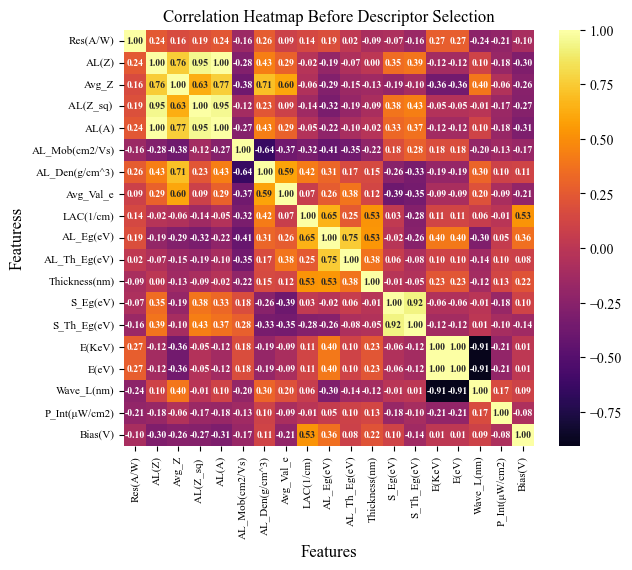

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columns to be dropped
columns_to_drop = ['Reference', 'TopContact', 'TopContact_Z', 'BackContact', 'BackContact_Z', 'ActiveLayer',
                   'Substrate', 'SubstrateType', 'Dark_I(μA)',
                   'Photo_I(μA)', 'ON/OFF']

# Drop the specified columns
df_reduced = df.drop(columns=columns_to_drop)

# Rearrange the columns to make 'Responsivity(A/W)' the first column
columns = ['Res(A/W)'] + [col for col in df_reduced.columns if col != 'Res(A/W)']
df_reduced = df_reduced[columns]

# Compute the correlation matrix
correlation_matrix = df_reduced.corr()

plt.figure(figsize=(6.6, 5.4))  # Set the size of the figure

# Create a heatmap
ax = sns.heatmap(correlation_matrix, annot=True, cmap='inferno', center=0, 
                 annot_kws={"size": 7, "weight": "bold", "fontname":"Times New Roman"},  # Font settings for annotations
                 fmt='.2f', cbar_kws={'shrink': 1})  # Adjust the color bar size if needed

# Customize font size and font name for x and y axis labels
ax.set_xlabel('Features', fontsize=12, fontname='Times New Roman')
ax.set_ylabel('Featuress', fontsize=12, fontname='Times New Roman')

# Customize font size and font name for x and y axis tick labels
ax.tick_params(axis='x', labelsize=8, rotation=90)
ax.tick_params(axis='y', labelsize=8, rotation=0)

# Set font for x and y axis tick labels
for label in ax.get_xticklabels():
    label.set_fontname('Times New Roman')
for label in ax.get_yticklabels():
    label.set_fontname('Times New Roman')

# Customize color bar font size and font name
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
for label in cbar.ax.get_yticklabels():
    label.set_fontname('Times New Roman')

plt.title('Correlation Heatmap Before Descriptor Selection', fontsize=12, fontname='Times New Roman')
# Show the plot
plt.show()

When two or more descriptors exhibit a Pearson correlation coefficient $-0.9\geq r\geq 0.9$, this indicates a high degree of multicollinearity between them. To reduce redundancy and avoid multicollinearity, only one descriptor from each highly correlated pair (or group) will be retained, while the others will be discarded. 

## Correlation matrix after descriptor selection

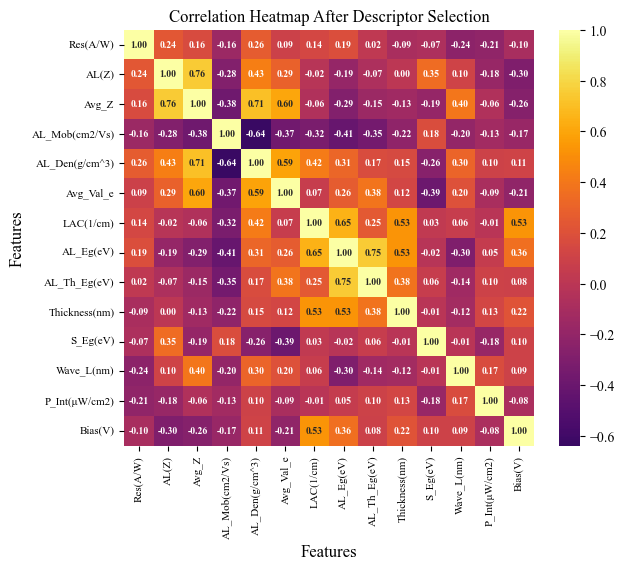

In [8]:
columns_to_drop = ['Reference', 'TopContact','TopContact_Z', 'BackContact','BackContact_Z', 'ActiveLayer', 'AL(Z_sq) ', 'AL(A)',
             'Substrate', 'SubstrateType', 'Dark_I(μA)', 'E(eV)', 'E(KeV)', 'S_Th_Eg(eV)',
             'Photo_I(μA)', 'ON/OFF']
# Drop the specified columns
df_reduced = df.drop(columns=columns_to_drop)

# Rearrange the columns to make 'Responsivity(A/W)' the first column
columns = ['Res(A/W)'] + [col for col in df_reduced.columns if col != 'Res(A/W)']
df_reduced = df_reduced[columns]

# Compute the correlation matrix
correlation_matrix = df_reduced.corr()

#Plotting the results
plt.figure(figsize=(6.6, 5.4))  # Set the size of the figure

# Create a heatmap
ax = sns.heatmap(correlation_matrix, annot=True, cmap='inferno', center=0, 
                 annot_kws={"size": 7, "weight": "bold", "fontname":"Times New Roman"},  # Font settings for annotations
                 fmt='.2f', cbar_kws={'shrink': 1})  # Adjust the color bar size if needed

# Customize font size and font name for x and y axis labels
ax.set_xlabel('Features', fontsize=12, fontname='Times New Roman')
ax.set_ylabel('Features', fontsize=12, fontname='Times New Roman')

# Customize font size and font name for x and y axis tick labels
ax.tick_params(axis='x', labelsize=8, rotation=90)
ax.tick_params(axis='y', labelsize=8, rotation=0)

# Set font for x and y axis tick labels
for label in ax.get_xticklabels():
    label.set_fontname('Times New Roman')
for label in ax.get_yticklabels():
    label.set_fontname('Times New Roman')

# Customize color bar font size and font name
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
for label in cbar.ax.get_yticklabels():
    label.set_fontname('Times New Roman')

# Set the title with the desired font
plt.title('Correlation Heatmap After Descriptor Selection', fontsize=12, fontname='Times New Roman')
# Show the plot
plt.show()

# Descriptors, training and testing data set

In [9]:
X = df.drop(['Res(A/W)', 'Reference', 'TopContact','TopContact_Z', 'BackContact','BackContact_Z', 'ActiveLayer', 'AL(Z_sq) ', 'AL(A)',
             'Substrate', 'SubstrateType', 'Dark_I(μA)', 'E(eV)', 'E(KeV)', 'S_Th_Eg(eV)',
             'Photo_I(μA)', 'ON/OFF'], axis=1)
X;

In [10]:
# Check for NaN values
nan_count = X.isna().sum()
print(f"Number of NaN values: {nan_count}")

# Locations of NaN values
nan_locations = X[y.isna()]
print("Locations of NaN values:\n", nan_locations)

Number of NaN values: AL(Z)             0
Avg_Z             0
AL_Mob(cm2/Vs)    0
AL_Den(g/cm^3)    0
Avg_Val_e         0
LAC(1/cm)         0
AL_Eg(eV)         0
AL_Th_Eg(eV)      0
Thickness(nm)     0
S_Eg(eV)          0
Wave_L(nm)        0
P_Int(μW/cm2)     0
Bias(V)           0
dtype: int64
Locations of NaN values:
 Empty DataFrame
Columns: [AL(Z), Avg_Z, AL_Mob(cm2/Vs), AL_Den(g/cm^3), Avg_Val_e, LAC(1/cm), AL_Eg(eV), AL_Th_Eg(eV), Thickness(nm), S_Eg(eV), Wave_L(nm), P_Int(μW/cm2), Bias(V)]
Index: []


## Data splitting: Training: 70% , Testing: 30%

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [12]:
# to see the X_train, remove ;
X_train;

In [13]:
X_test;

In [14]:
import pandas as pd
# To display X_test with the original indices
X_test_with_indices = X_test.reset_index()
X_test_with_indices.head()  # Display the first few rows

,index,AL(Z),Avg_Z,AL_Mob(cm2/Vs),AL_Den(g/cm^3),Avg_Val_e,LAC(1/cm),AL_Eg(eV),AL_Th_Eg(eV),Thickness(nm),S_Eg(eV),Wave_L(nm),P_Int(μW/cm2),Bias(V)
0,521,110,36.66,90.0,6.51,6.00,214837.30,1.55,1.30,500.0,1.12,980.0,50000.000000,2.319383
1,1133,107,35.66,19.0,7.11,4.66,81362.90,1.41,1.32,7.8,1.12,632.0,16500.000000,1.000000
2,683,62,20.66,150.0,5.78,5.33,90467.59,3.96,3.96,400.0,1.12,365.0,10000.000000,1.800343
3,191,142,47.33,180.0,8.66,6.00,242315.50,1.65,1.45,2.0,1.10,670.0,119.805461,1.000000
4,479,110,36.66,90.0,6.51,6.00,214837.30,1.55,1.30,500.0,1.12,980.0,70000.000000,4.720781


In [15]:
X_test_with_indices;

In [16]:
# Set display options to show all rows
pd.set_option('display.max_rows', None)
X_test_with_indices;

# Applying ML Regression Models

## Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(bootstrap=True,
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=1000,
    random_state=100
)

rf.fit(X_train, y_train)
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [19]:
import numpy as np

# Calculate metrics
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_rmse = np.sqrt(rf_train_mse)  # Calculate RMSE for training data
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_train_mae = mean_absolute_error(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_rmse = np.sqrt(rf_test_mse)  # Calculate RMSE for testing data
rf_test_r2 = r2_score(y_test, y_rf_test_pred)
rf_test_mae = mean_absolute_error(y_test, y_rf_test_pred)

# Create a DataFrame to store the results with RMSE included
rf_results = pd.DataFrame([['Random Forest', rf_train_mse, rf_train_rmse, rf_train_mae, rf_train_r2, 
                            rf_test_mse, rf_test_rmse, rf_test_mae, rf_test_r2]],
                          columns=['Method', 'Training MSE', 'Training RMSE', 'Training MAE', 'Training R2', 
                                   'Test MSE', 'Test RMSE', 'Test MAE', 'Test R2'])

rf_results


,Method,Training MSE,Training RMSE,Training MAE,Training R2,Test MSE,Test RMSE,Test MAE,Test R2
0,Random Forest,1.147001,1.070981,0.264357,0.999602,4.082231,2.020453,0.64223,0.998495


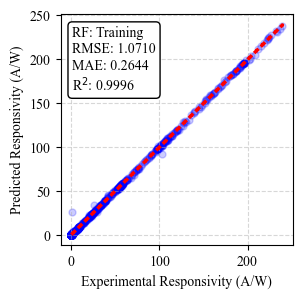

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Create the figure
plt.figure(figsize=(3, 3))

# Scatter plot with controllable dot size
dot_size = 25  # Set the dot size (adjust as needed)
plt.scatter(x=y_train, y=y_rf_train_pred, c="blue", alpha=0.2, s=dot_size)

# Line of best fit
z = np.polyfit(y_train, y_rf_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train), color='red', linestyle=':', linewidth=2.5)  # Custom line style and width

# Labels with custom font properties
plt.ylabel('Predicted Responsivity (A/W)', fontsize=10, fontname='Times New Roman')
plt.xlabel('Experimental Responsivity (A/W)', fontsize=10, fontname='Times New Roman')

# Title with custom font properties
#plt.title('Random Forest: Training', fontsize=12, fontweight='bold', fontname='Times New Roman')

# Customize ticks
plt.xticks(fontsize=10, fontname='Times New Roman', rotation=0)
plt.yticks(fontsize=10, fontname='Times New Roman')

# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add a box with MSE and R² values
textstr = f'RF: Training\nRMSE: {rf_train_rmse:.4f}\nMAE: {rf_train_mae:.4f}\nR$^2$: {rf_train_r2:.4f}'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props, fontname='Times New Roman')
# Show the plot
plt.show()

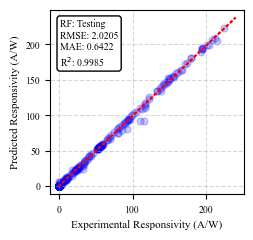

In [21]:
plt.figure(figsize=(2.5, 2.4))
# Scatter plot with controllable dot size
dot_size = 25  # Set the dot size (adjust as needed)
plt.scatter(x=y_test, y=y_rf_test_pred, c="blue", alpha=0.2, s=dot_size)

# Line of best fit
z = np.polyfit(y_test, y_rf_test_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train), color='red', linestyle=':', linewidth=1.5)  # Custom line style and width

# Labels with custom font properties
plt.ylabel('Predicted Responsivity (A/W)', fontsize=8, fontname='Times New Roman')
plt.xlabel('Experimental Responsivity (A/W)', fontsize=8, fontname='Times New Roman')

# Title with custom font properties
#plt.title('Random Forest: Training', fontsize=12, fontweight='bold', fontname='Times New Roman')

# Customize ticks
plt.xticks(fontsize=7, fontname='Times New Roman', rotation=0)
plt.yticks(fontsize=7, fontname='Times New Roman')

# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add a box with MSE, MAE and R² values
textstr = f'RF: Testing\nRMSE: {rf_test_rmse:.4f}\nMAE: {rf_test_mae:.4f}\nR$^2$: {rf_test_r2:.4f}'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=7,
         verticalalignment='top', bbox=props, fontname='Times New Roman')
# Show the plot
plt.show()

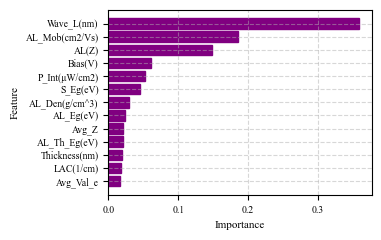

In [22]:
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
import pandas as pd

# Feature importance
feature_importances = rf.feature_importances_
features = X_train.columns  
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances with customizations
#plt.figure(figsize=(2.2, 1.8))
plt.figure(figsize=(3.4, 2.4))
# Customize font properties
font_props = font_manager.FontProperties(family='Times New Roman', size=8, weight='bold')

# Plot the bars
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color='purple')

# Customize the bar colors (you can set different colors for each bar if needed)
for bar in bars:
    bar.set_color('purple')

# Set font properties for labels
plt.xlabel('Importance', fontsize=8, fontname='Times New Roman')
plt.ylabel('Feature', fontsize=8, fontname='Times New Roman')
plt.grid(True, linestyle='--', alpha=0.5)

# Customize x-tick values
plt.xticks([0, 0.1, 0.2, 0.3], fontsize=7, fontname='Times New Roman', color='black')
plt.yticks(fontsize=7, fontname='Times New Roman', color='black')

# Invert y-axis to have the most important feature at the top
plt.gca().invert_yaxis()
# Show the plot
plt.show()

## XGBoost

In [23]:
#pip install xgboost

In [24]:
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)
xgb_model = xgb.XGBRegressor(n_estimators=900, learning_rate=0.06, max_depth=8, subsample=0.6, reg_lambda=1.7, gamma=0.1,
                             reg_alpha=0, random_state=100)
xgb_model.fit(X_train1, y_train)
# Make predictions
y_xgb_train_pred = xgb_model.predict(X_train1)
y_xgb_test_pred = xgb_model.predict(X_test1)

In [25]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluate the model
xgb_train_mse = mean_squared_error(y_train, y_xgb_train_pred)
xgb_train_rmse = np.sqrt(xgb_train_mse)  # Calculate RMSE for training data
xgb_train_r2 = r2_score(y_train, y_xgb_train_pred)
xgb_train_mae = mean_absolute_error(y_train, y_xgb_train_pred)

xgb_test_mse = mean_squared_error(y_test, y_xgb_test_pred)
xgb_test_rmse = np.sqrt(xgb_test_mse)  # Calculate RMSE for testing data
xgb_test_r2 = r2_score(y_test, y_xgb_test_pred)
xgb_test_mae = mean_absolute_error(y_test, y_xgb_test_pred)

# Store results in a DataFrame with RMSE included
xgb_results = pd.DataFrame([['XGBoost', xgb_train_mse, xgb_train_rmse, xgb_train_mae, xgb_train_r2, 
                             xgb_test_mse, xgb_test_rmse, xgb_test_mae, xgb_test_r2]],
                           columns=['Method', 'Training MSE', 'Training RMSE', 'Training MAE', 'Training R2', 
                                    'Test MSE', 'Test RMSE', 'Test MAE', 'Test R2'])

# Display the results
xgb_results


,Method,Training MSE,Training RMSE,Training MAE,Training R2,Test MSE,Test RMSE,Test MAE,Test R2
0,XGBoost,1.653195,1.285766,0.455408,0.999427,6.865474,2.620205,1.038679,0.997468


In [26]:
df_models = pd.concat([rf_results,xgb_results], axis=0)
df_models.reset_index(drop=True)

,Method,Training MSE,Training RMSE,Training MAE,Training R2,Test MSE,Test RMSE,Test MAE,Test R2
0,Random Forest,1.147001,1.070981,0.264357,0.999602,4.082231,2.020453,0.642230,0.998495
1,XGBoost,1.653195,1.285766,0.455408,0.999427,6.865474,2.620205,1.038679,0.997468


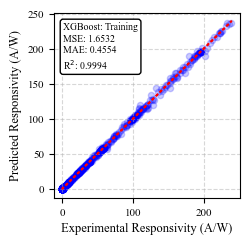

In [27]:
# Create the figure
plt.figure(figsize=(2.4, 2.4))

# Scatter plot with controllable dot size
dot_size = 20  # Set the dot size (adjust as needed)
plt.scatter(x=y_train, y=y_xgb_train_pred, c="blue", alpha=0.2, s=dot_size)

# Line of best fit
z = np.polyfit(y_train, y_xgb_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train), color='red', linestyle=':', linewidth=1.5)  # Custom line style and width

# Labels with custom font properties
plt.ylabel('Predicted Responsivity (A/W)', fontsize=9, fontname='Times New Roman')
plt.xlabel('Experimental Responsivity (A/W)', fontsize=9, fontname='Times New Roman')

# Title with custom font properties
#plt.title('XGBoost: Training', fontsize=12, fontweight='bold', fontname='Times New Roman')

# Customize ticks
plt.xticks(fontsize=8, fontname='Times New Roman', rotation=0)
plt.yticks(fontsize=8, fontname='Times New Roman')

# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add a box with MSE and R² values
textstr = f'XGBoost: Training\nMSE: {xgb_train_mse:.4f}\nMAE: {xgb_train_mae:.4f}\nR$^2$: {xgb_train_r2:.4f}'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=7,
         verticalalignment='top', bbox=props, fontname='Times New Roman')
# Show the plot
plt.show()

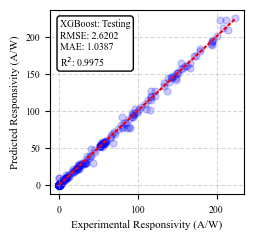

In [28]:
# Create the figure
#plt.figure(figsize=(1.8, 1.8))
plt.figure(figsize=(2.5, 2.4))
# Scatter plot with controllable dot size
dot_size = 25  # Set the dot size (adjust as needed)
plt.scatter(x=y_test, y=y_xgb_test_pred, c="blue", alpha=0.2, s=dot_size)

# Line of best fit
z = np.polyfit(y_test, y_xgb_test_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red', linestyle=':', linewidth=1.5)  # Custom line style and width

# Labels with custom font properties
plt.ylabel('Predicted Responsivity (A/W)', fontsize=8, fontname='Times New Roman')
plt.xlabel('Experimental Responsivity (A/W)', fontsize=8, fontname='Times New Roman')

# Title with custom font properties
#plt.title('XGBoost: Testing', fontsize=12, fontweight='bold', fontname='Times New Roman')

# Customize ticks
plt.xticks(fontsize=7, fontname='Times New Roman', rotation=0)
plt.yticks(fontsize=7, fontname='Times New Roman')

# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add a box with MSE and R² values
textstr = f'XGBoost: Testing\nRMSE: {xgb_test_rmse:.4f}\nMAE: {xgb_test_mae:.4f}\nR$^2$: {xgb_test_r2:.4f}'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=7,
         verticalalignment='top', bbox=props, fontname='Times New Roman')
# Show the plot
plt.show()

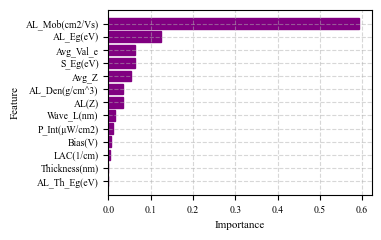

In [29]:
# Feature importance
feature_importances = xgb_model.feature_importances_
features = X_train.columns  
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

#print("\nFeature Importances:\n", importance_df)

# Plot feature importances with customizations
#plt.figure(figsize=(2.2, 1.8))
plt.figure(figsize=(3.4, 2.4))

# Customize font properties
font_props = font_manager.FontProperties(family='Times New Roman', size=8, weight='bold')

# Plot the bars
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color='purple')

# Customize the bar colors (you can set different colors for each bar if needed)
for bar in bars:
    bar.set_color('purple')

# Set font properties for labels
plt.xlabel('Importance', fontsize=8, fontname='Times New Roman')
plt.ylabel('Feature', fontsize=8, fontname='Times New Roman')
plt.grid(True, linestyle='--', alpha=0.5)

# Customize x-tick values
plt.xticks([0, 0.1, 0.2, 0.3,0.4,0.5,0.6], fontsize=7, fontname='Times New Roman', color='black')
plt.yticks(fontsize=7, fontname='Times New Roman', color='black')

# Invert y-axis to have the most important feature at the top
plt.gca().invert_yaxis()
# Show the plot
plt.show()

## Extra Trees

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
etr_model = ExtraTreesRegressor(n_estimators=700, max_depth=30, random_state=100)
# Train the model
etr_model.fit(X_train_scaled, y_train)
# Make predictions
y_etr_train_pred = etr_model.predict(X_train_scaled)
y_etr_test_pred = etr_model.predict(X_test_scaled)

In [31]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluate the model
etr_train_mse = mean_squared_error(y_train, y_etr_train_pred)
etr_train_rmse = np.sqrt(etr_train_mse)  # Calculate RMSE for training data
etr_train_r2 = r2_score(y_train, y_etr_train_pred)
etr_train_mae = mean_absolute_error(y_train, y_etr_train_pred)

etr_test_mse = mean_squared_error(y_test, y_etr_test_pred)
etr_test_rmse = np.sqrt(etr_test_mse)  # Calculate RMSE for testing data
etr_test_r2 = r2_score(y_test, y_etr_test_pred)
etr_test_mae = mean_absolute_error(y_test, y_etr_test_pred)

# Store results in a DataFrame with RMSE included
etr_results = pd.DataFrame([['Extra Trees', etr_train_mse, etr_train_rmse, etr_train_mae, etr_train_r2, 
                             etr_test_mse, etr_test_rmse, etr_test_mae, etr_test_r2]],
                           columns=['Method', 'Training MSE', 'Training RMSE', 'Training MAE', 'Training R2', 
                                    'Test MSE', 'Test RMSE', 'Test MAE', 'Test R2'])

# Display the results
etr_results


,Method,Training MSE,Training RMSE,Training MAE,Training R2,Test MSE,Test RMSE,Test MAE,Test R2
0,Extra Trees,3.428969e-25,5.855740e-13,2.437562e-13,1.0,0.807004,0.898334,0.20075,0.999702


In [32]:
# Concatenate results with other models' results
df_models = pd.concat([rf_results, xgb_results, etr_results], axis=0)
df_models.reset_index(drop=True, inplace=True)
#print(df_models)
df_models.reset_index(drop=True)

,Method,Training MSE,Training RMSE,Training MAE,Training R2,Test MSE,Test RMSE,Test MAE,Test R2
0,Random Forest,1.147001e+00,1.070981e+00,2.643568e-01,0.999602,4.082231,2.020453,0.642230,0.998495
1,XGBoost,1.653195e+00,1.285766e+00,4.554084e-01,0.999427,6.865474,2.620205,1.038679,0.997468
2,Extra Trees,3.428969e-25,5.855740e-13,2.437562e-13,1.000000,0.807004,0.898334,0.200750,0.999702


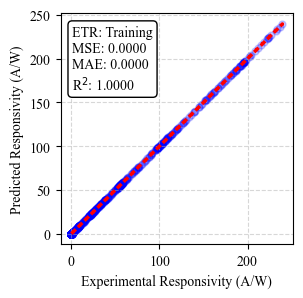

In [33]:
# Create the figure
plt.figure(figsize=(3, 3))

# Scatter plot with controllable dot size
dot_size = 25  # Set the dot size (adjust as needed)
plt.scatter(x=y_train, y=y_etr_train_pred, c="blue", alpha=0.2, s=dot_size)

# Line of best fit
z = np.polyfit(y_train, y_etr_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train), color='red', linestyle=':', linewidth=2.5)  # Custom line style and width

# Labels with custom font properties
plt.ylabel('Predicted Responsivity (A/W)', fontsize=10, fontname='Times New Roman')
plt.xlabel('Experimental Responsivity (A/W)', fontsize=10, fontname='Times New Roman')

# Title with custom font properties
#plt.title('ETR: Training', fontsize=12, fontweight='bold', fontname='Times New Roman')

# Customize ticks
plt.xticks(fontsize=10, fontname='Times New Roman', rotation=0)
plt.yticks(fontsize=10, fontname='Times New Roman')

# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add a box with MSE and R² values
textstr = f'ETR: Training\nMSE: {etr_train_mse:.4f}\nMAE: {etr_train_mae:.4f}\nR$^2$: {etr_train_r2:.4f}'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props, fontname='Times New Roman')
# Show the plot
plt.show()

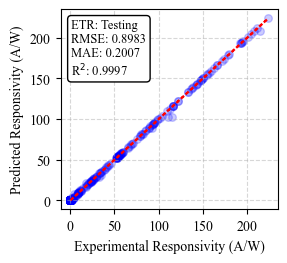

In [34]:
# Create the figure
plt.figure(figsize=(2.8, 2.6))

# Scatter plot with controllable dot size
dot_size = 30  # Set the dot size (adjust as needed)
plt.scatter(x=y_test, y=y_etr_test_pred, c="blue", alpha=0.2, s=dot_size)

# Line of best fit
z = np.polyfit(y_test, y_etr_test_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red', linestyle=':', linewidth=1.7)  # Custom line style and width

# Labels with custom font properties
plt.ylabel('Predicted Responsivity (A/W)', fontsize=10, fontname='Times New Roman')
plt.xlabel('Experimental Responsivity (A/W)', fontsize=10, fontname='Times New Roman')

# Title with custom font properties
#plt.title('ETR: Testing', fontsize=12, fontweight='bold', fontname='Times New Roman')

# Customize ticks
plt.xticks(fontsize=10, fontname='Times New Roman', rotation=0)
plt.yticks(fontsize=10, fontname='Times New Roman')

# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add a box with MSE and R² values
textstr = f'ETR: Testing\nRMSE: {etr_test_rmse:.4f}\nMAE: {etr_test_mae:.4f}\nR$^2$: {etr_test_r2:.4f}'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=9,
         verticalalignment='top', bbox=props, fontname='Times New Roman')
# Show the plot
plt.show()

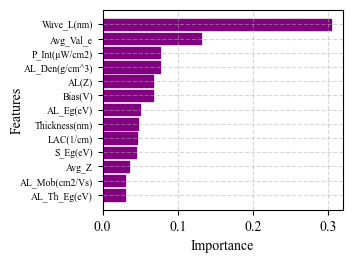

In [35]:
from matplotlib import font_manager
# Feature importance
etr_feature_importances = etr_model.feature_importances_
features = X_train.columns  # Use the actual feature names from your DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': etr_feature_importances
}).sort_values(by='Importance', ascending=False)

#print("\nFeature Importances:\n", importance_df)

# Plot feature importances with customizations
plt.figure(figsize=(3.1, 2.6))

# Customize font properties
font_props = font_manager.FontProperties(family='Times New Roman', size=10, weight='bold')

# Plot the bars
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color='purple')

# Customize the bar colors (you can set different colors for each bar if needed)
for bar in bars:
    bar.set_color('purple')

# Set font properties for labels
plt.xlabel('Importance', fontsize=10, fontname='Times New Roman')
plt.ylabel('Features', fontsize=10, fontname='Times New Roman', labelpad=-3) # for automatic position

plt.grid(True, linestyle='--', alpha=0.5)

# Customize x-tick values
plt.xticks([0, 0.1, 0.2, 0.3], fontsize=10, fontname='Times New Roman', color='black')
plt.yticks(fontsize=7, fontname='Times New Roman', color='black')

# Invert y-axis to have the most important feature at the top
plt.gca().invert_yaxis()
# Show the plot
plt.show()

In [37]:
#Making predictions on unseen data
Data_1 = pd.DataFrame([[66, 16.5, 3000, 4.42, 6, 107857.3, 3.2, 3.16, 168, 1.1, 13.5, 1769, 0.001]],columns=X_train.columns) #MoO3
Data_2 = pd.DataFrame([[322, 64.4, 467, 7.32, 5.6, 82236, 0.165, 0.34, 168, 1.1, 13.5, 1769, 0.001]],columns=X_train.columns) #Bi2Te3
Data_3 = pd.DataFrame([[66, 22, 100, 6.87, 5.33, 140986, 3.6, 0.85, 168, 1.1, 13.5, 1769, 0.001]],columns=X_train.columns) #SnO2
Data_4 = pd.DataFrame([[36, 18, 45, 6.76, 4, 360757, 3.8, 2.3, 168, 1.1, 13.5, 1769, 0.001]],columns=X_train.columns) #NiO
Data_5 = pd.DataFrame([[86, 17.2, 200, 5.89, 4.8, 381620, 4.9, 2.4, 168, 1.1, 13.5, 1769, 0.001]],columns=X_train.columns) #Ga2O3
Data_6 = pd.DataFrame([[38, 12.66, 0.1, 3.86, 5.33, 117296, 2.95, 2.68, 168, 1.1, 13.5, 1769, 0.001]],columns=X_train.columns) #TiO2
Data_7 = pd.DataFrame([[142, 47.33, 180, 8.66, 6, 242315, 1.64, 1.45, 168, 1.1, 13.5, 1769, 0.001]],columns=X_train.columns) #WSe2
Data_8 = pd.DataFrame([[118, 39.33, 450, 5.54, 5.33, 175006, 1.35, 0.7, 168, 1.1, 13.5, 1769, 0.001]],columns=X_train.columns) #SnSe2
Data_9 = pd.DataFrame([[110, 36.66, 90, 6.51, 6, 214837.3, 1.55, 1.3, 168, 1.1, 13.5, 1769, 0.001]],columns=X_train.columns) #MoSe2
Data_10 = pd.DataFrame([[146, 48.66, 180, 7.23, 6, 78345.82, 1.1, 0.86, 168, 1.1, 13.5, 1769, 0.001]],columns=X_train.columns) #MoTe2
Data_11 = pd.DataFrame([[37, 18.5, 49, 6.16, 3.5, 258252.6, 1.9, 0, 168, 1.1, 13.5, 1769, 0.001]],columns=X_train.columns) #CuO
Data_12 = pd.DataFrame([[66, 33, 55, 4.9, 5, 59066.49, 1.03, 0.9, 168, 1.1, 13.5, 1769, 0.001]],columns=X_train.columns) #SnS
Data_13 = pd.DataFrame([[260, 21.66, 7000, 4.28, 3.33, 106808.8, 1.5, 1.57, 168, 1.1, 13.5, 1769, 0.001]],columns=X_train.columns) #CH3NH3PbI3
Data_14 = pd.DataFrame([[6, 6, 100000, 1.83, 4, 38597, 0, 0, 1.5, 1.1, 13.5, 1769, 0.001]],columns=X_train.columns) #Graphene
Data_15 = pd.DataFrame([[38, 19, 166, 5.7, 4, 364000, 3.3, 0.74, 168, 1.1, 13.5, 1769, 0.001]], columns=X_train.columns) # ZnO
Data_16 = pd.DataFrame([[106, 35.33, 50, 7.23, 6, 94835, 2.15, 1.26, 168, 1.1, 13.5, 1769, 0.001]], columns=X_train.columns) # WS2
Data_17 = pd.DataFrame([[74, 24.67, 200, 4.67, 6, 50830, 1.9, 1.2, 168, 1.1, 13.5, 1769, 0.001]], columns=X_train.columns) # MoS2
Data_18 = pd.DataFrame([[242, 48.4, 13, 5.01, 5.2, 115799, 3.1, 2.88, 168, 1.1, 13.5, 1769, 0.001]], columns=X_train.columns) # CsPbBr3
Data_19 = pd.DataFrame([[38, 19, 800, 6.08, 4, 388034, 3.2, 3.4, 168, 1.1, 13.5, 1769, 0.001]], columns=X_train.columns) # GaN
Data_20 = pd.DataFrame([[64, 32, 0.15, 5.26, 2, 184584, 3, 0.49, 168, 1.1, 13.5, 1769, 0.001]], columns=X_train.columns) # CuBr
Data_21 = pd.DataFrame([[204, 40.8, 17, 5.51, 5.6, 141488, 1.21, 0.76, 168, 1.1, 13.5, 1769, 0.001]], columns=X_train.columns) # Sb2Se3
Data_22 = pd.DataFrame([[214, 42.8, 10, 6.6, 5.6, 75761, 1.52, 1.36, 168, 1.1, 13.5, 1769, 0.001]], columns=X_train.columns) # Bi2S3
Data_23 = pd.DataFrame([[82, 27.33, 756, 4.17, 5.33, 47958, 2.18, 1.51, 168, 1.1, 13.5, 1769, 0.001]], columns=X_train.columns) # SnS2
Data_24 = pd.DataFrame([[70, 10, 228, 3.2, 4.57, 254643, 5, 4.25, 168, 1.1, 13.5, 1769, 0.001]], columns=X_train.columns) # Si3N4
Data_25 = pd.DataFrame([[14, 14, 1400, 2.33, 4, 253620, 1.12, 1.12, 168, 1.1, 13.5, 1769, 0.001]], columns=X_train.columns) # Si
Data_26 = pd.DataFrame([[186, 62, 60, 5.89, 5.33, 147574, 2.13, 1.64, 168, 1.1, 13.5, 1769, 0.001]], columns=X_train.columns) # HgI2
Data_27 = pd.DataFrame([[130, 43.33, 1000, 6.28, 3.33, 145370, 1.7, 0.09, 168, 1.1, 13.5, 1769, 0.001]], columns=X_train.columns) # CdZnTe
Data_28 = pd.DataFrame([[278, 55.6, 2500, 4.62, 5.2, 116542, 2.29, 1.44, 168, 1.1, 13.5, 1769, 0.001]], columns=X_train.columns) # CsPbBrI2


New_Data_1 = scaler.transform(Data_1)
New_Data_2 = scaler.transform(Data_2)
New_Data_3 = scaler.transform(Data_3)
New_Data_4 = scaler.transform(Data_4)
New_Data_5 = scaler.transform(Data_5)
New_Data_6 = scaler.transform(Data_6)
New_Data_7 = scaler.transform(Data_7)
New_Data_8 = scaler.transform(Data_8)
New_Data_9 = scaler.transform(Data_9)
New_Data_10 = scaler.transform(Data_10)
New_Data_11 = scaler.transform(Data_11)
New_Data_12 = scaler.transform(Data_12)
New_Data_13 = scaler.transform(Data_13)
New_Data_14 = scaler.transform(Data_14)
New_Data_15 = scaler.transform(Data_15)
New_Data_16 = scaler.transform(Data_16)
New_Data_17 = scaler.transform(Data_17)
New_Data_18 = scaler.transform(Data_18)
New_Data_19 = scaler.transform(Data_19)
New_Data_20 = scaler.transform(Data_20)
New_Data_21 = scaler.transform(Data_21)
New_Data_22 = scaler.transform(Data_22)
New_Data_23 = scaler.transform(Data_23)
New_Data_24 = scaler.transform(Data_24)
New_Data_25 = scaler.transform(Data_25)
New_Data_26 = scaler.transform(Data_26)
New_Data_27 = scaler.transform(Data_27)
New_Data_28 = scaler.transform(Data_28)

predicted_Responsivity_1 = etr_model.predict(New_Data_1)
predicted_Responsivity_2 = etr_model.predict(New_Data_2)
predicted_Responsivity_3 = etr_model.predict(New_Data_3)
predicted_Responsivity_4 = etr_model.predict(New_Data_4)
predicted_Responsivity_5 = etr_model.predict(New_Data_5)
predicted_Responsivity_6 = etr_model.predict(New_Data_6)
predicted_Responsivity_7 = etr_model.predict(New_Data_7)
predicted_Responsivity_8 = etr_model.predict(New_Data_8)
predicted_Responsivity_9 = etr_model.predict(New_Data_9)
predicted_Responsivity_10 = etr_model.predict(New_Data_10)
predicted_Responsivity_11 = etr_model.predict(New_Data_11)
predicted_Responsivity_12 = etr_model.predict(New_Data_12)
predicted_Responsivity_13 = etr_model.predict(New_Data_13)
predicted_Responsivity_14 = etr_model.predict(New_Data_14)
predicted_Responsivity_15 = etr_model.predict(New_Data_15)
predicted_Responsivity_16 = etr_model.predict(New_Data_16)
predicted_Responsivity_17 = etr_model.predict(New_Data_17)
predicted_Responsivity_18 = etr_model.predict(New_Data_18)
predicted_Responsivity_19 = etr_model.predict(New_Data_19)
predicted_Responsivity_20 = etr_model.predict(New_Data_20)
predicted_Responsivity_21 = etr_model.predict(New_Data_21)
predicted_Responsivity_22 = etr_model.predict(New_Data_22)
predicted_Responsivity_23 = etr_model.predict(New_Data_23)
predicted_Responsivity_24 = etr_model.predict(New_Data_24)
predicted_Responsivity_25 = etr_model.predict(New_Data_25)
predicted_Responsivity_26 = etr_model.predict(New_Data_26)
predicted_Responsivity_27 = etr_model.predict(New_Data_27)
predicted_Responsivity_28 = etr_model.predict(New_Data_28)


print("Responsivity MoO3:", predicted_Responsivity_1[0])
print("Responsivity Bi2Te3:", predicted_Responsivity_2[0])
print("Responsivity SnO2:", predicted_Responsivity_3[0])
print("Responsivity NiO:", predicted_Responsivity_4[0])
print("Responsivity Ga2O3:", predicted_Responsivity_5[0])
print("Responsivity TiO2:", predicted_Responsivity_6[0])
print("Responsivity WSe2:", predicted_Responsivity_7[0])
print("Responsivity SnSe2:", predicted_Responsivity_8[0])
print("Responsivity MoSe2:", predicted_Responsivity_9[0])
print("Responsivity MoTe2:", predicted_Responsivity_10[0])
print("Responsivity CuO:", predicted_Responsivity_11[0])
print("Responsivity SnS:", predicted_Responsivity_12[0])
print("Responsivity CH3NH3PbI3:", predicted_Responsivity_13[0])
print("Graphene:", predicted_Responsivity_14[0])
print("ZnO:", predicted_Responsivity_15[0])
print("WS2:", predicted_Responsivity_16[0])
print("MoS2:", predicted_Responsivity_17[0])
print("CsPbBr3:", predicted_Responsivity_18[0])
print("GaN:", predicted_Responsivity_19[0])
print("CuBr:", predicted_Responsivity_20[0])
print("Sb2Se3:", predicted_Responsivity_21[0])
print("Bi2S3:", predicted_Responsivity_22[0])
print("SnS2:", predicted_Responsivity_23[0])
print("Si3N4:", predicted_Responsivity_24[0])
print("Si:", predicted_Responsivity_25[0])
print("HgI2:", predicted_Responsivity_26[0])
print("CdZnTe:", predicted_Responsivity_27[0])
print("CsPbBrI2:", predicted_Responsivity_28[0])

Responsivity MoO3: 38.7693163249473
Responsivity Bi2Te3: 18.014950463941478
Responsivity SnO2: 18.71565864008431
Responsivity NiO: 11.02321190635997
Responsivity Ga2O3: 7.513943034385723
Responsivity TiO2: 4.530606171424289
Responsivity WSe2: 4.657664020785741
Responsivity SnSe2: 4.672641246671419
Responsivity MoSe2: 8.018529845630002
Responsivity MoTe2: 12.247960549179957
Responsivity CuO: 6.170474459171394
Responsivity SnS: 4.322522757928543
Responsivity CH3NH3PbI3: 11.370938737184302
Graphene: 1.2581908704042855
ZnO: 5.923009183304262
WS2: 25.097371613424375
MoS2: 16.438493551325728
CsPbBr3: 18.804777779588587
GaN: 7.03717683850855
CuBr: 15.283210883580042
Sb2Se3: 10.929838420162833
Bi2S3: 26.013614173810097
SnS2: 11.698288263152829
Si3N4: 16.65795125604719
Si: 3.109042641774286
HgI2: 14.784255405351443
CdZnTe: 23.939526428785815
CsPbBrI2: 17.901364122169976


### Predicting different parameters of the material

#### 2D Line Plots 

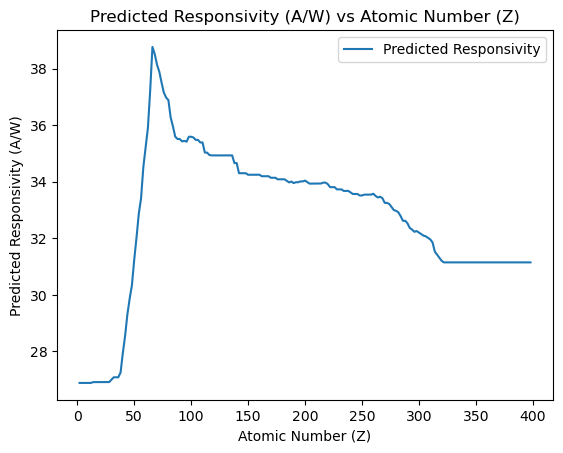

In [39]:
# Define the range of t values
t_values = np.arange(2, 400, 2)

# Initialize an empty list to store predicted responsivities
predicted_responsivities = []

# Loop over each t value
for t in t_values:
    Res = pd.DataFrame([[t, 16.5, 3000, 4.42, 6, 107857.3, 3.2, 3.16, 168, 1.1, 13.5, 1769, 0.001]], columns=X_train.columns)
    New_Res = scaler.transform(Res)
    predicted_Responsivity = etr_model.predict(New_Res)
    predicted_responsivities.append(predicted_Responsivity[0])

# Plot Res vs t
plt.plot(t_values, predicted_responsivities, label='Predicted Responsivity')
plt.xlabel('Atomic Number (Z)')
plt.ylabel('Predicted Responsivity (A/W)')
plt.title('Predicted Responsivity (A/W) vs Atomic Number (Z)')
plt.legend()
plt.show()

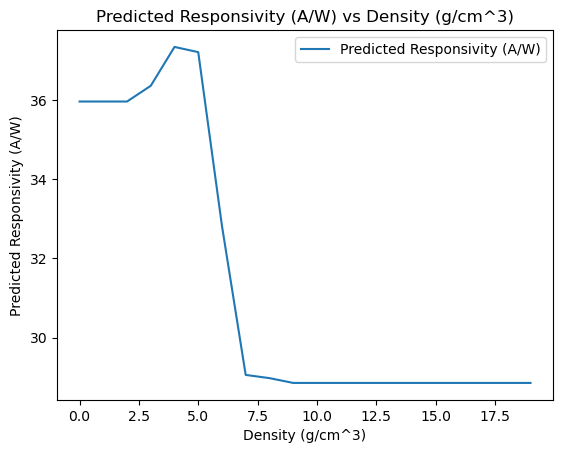

In [40]:
# Define the range of t values
t_values = np.arange(0, 20, 1)

# Initialize an empty list to store predicted responsivities
predicted_responsivities = []

# Loop over each t value
for t in t_values:
    Res = pd.DataFrame([[66, 16.5, 3000, t, 6, 107857.3, 3.2, 3.16, 168, 1.1, 13.5, 1769, 0.001]], columns=X_train.columns)
    New_Res = scaler.transform(Res)
    predicted_Responsivity = etr_model.predict(New_Res)
    predicted_responsivities.append(predicted_Responsivity[0])

# Plot Res vs t
plt.plot(t_values, predicted_responsivities, label='Predicted Responsivity (A/W)')
plt.xlabel('Density (g/cm^3)')
plt.ylabel('Predicted Responsivity (A/W)')
plt.title('Predicted Responsivity (A/W) vs Density (g/cm^3)')
plt.legend()
plt.show()

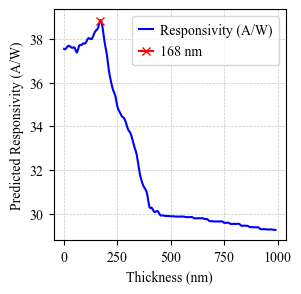

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Define the range of t values with a step of 10 for original data
t_values = np.arange(0, 1000, 10)

# Initialize an empty list to store predicted responsivities
predicted_responsivities = []

# Loop over each t value
for t in t_values:
    Res = pd.DataFrame([[66, 16.5, 3000, 4.42, 6, 107857.3, 3.2, 3.16, t, 1.1, 13.5, 1769, 0.001]], columns=X_train.columns)
    New_Res = scaler.transform(Res)
    predicted_Responsivity = etr_model.predict(New_Res)
    predicted_responsivities.append(predicted_Responsivity[0])

# Define the interpolated t values within the range of t_values
t_interpolated = np.arange(0, 991, 5)  # limited to 990 to avoid extrapolation
interpolator = interp1d(t_values, predicted_responsivities, kind='cubic')
predicted_responsivities_interpolated = interpolator(t_interpolated)

# Plotting with customized style and font
plt.figure(figsize=(3, 3))  # Set the figure size

# Plot the main line with a custom label
line, = plt.plot(t_interpolated, predicted_responsivities_interpolated, color='blue', linestyle='-', linewidth=1.5, label='Predicted Responsivity (A/W)')
plt.xlabel('Thickness (nm)', fontname='Times New Roman', fontsize=10)
plt.ylabel('Predicted Responsivity (A/W)', fontname='Times New Roman', fontsize=10)
#plt.title('Predicted Responsivity (A/W) vs Thickness (nm)', fontname='Times New Roman', fontsize=10)

# Add a cross marker at x=168 without additional text near the marker
cross_x = 168
cross_y = interpolator(cross_x)  # Find the interpolated y-value at x=168
cross_marker, = plt.plot(cross_x, cross_y, marker='x', color='red', markersize=6, label='168 nm')

# Set Times New Roman for ticks
plt.xticks(fontname='Times New Roman')
plt.yticks(fontname='Times New Roman')

# Add grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Combined Legend with Newline Format, Tight Box, and Aligned Items
plt.legend([line, cross_marker], ['Responsivity (A/W)', '168 nm'], loc='best', fontsize=8, 
           prop={'family': 'Times New Roman'}, handletextpad=0.5, borderpad=0.5, handlelength=1)

# Show plot
plt.show()


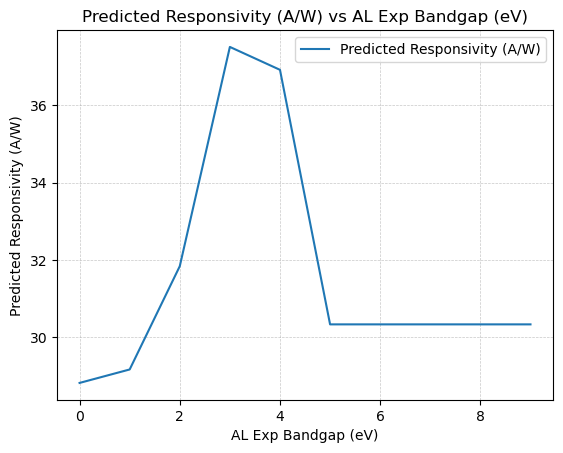

In [42]:
# Define the range of t values
t_values = np.arange(0, 10, 1)

# Initialize an empty list to store predicted responsivities
predicted_responsivities = []

# Loop over each t value
for t in t_values:
    Res = pd.DataFrame([[66, 16.5, 3000, 4.42, 6, 107857.3, t, 3.16, 168, 1.1, 13.5, 1769, 0.001]], columns=X_train.columns)
    New_Res = scaler.transform(Res)
    predicted_Responsivity = etr_model.predict(New_Res)
    predicted_responsivities.append(predicted_Responsivity[0])

# Plot Res vs t
plt.plot(t_values, predicted_responsivities, label='Predicted Responsivity (A/W)')
plt.xlabel('AL Exp Bandgap (eV)')
plt.ylabel('Predicted Responsivity (A/W)')
plt.title('Predicted Responsivity (A/W) vs AL Exp Bandgap (eV)')

# Add grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Show legend and plot
plt.legend()
plt.show()


#### 3D Density Plots

Looking for Atomic number and density of Active layer

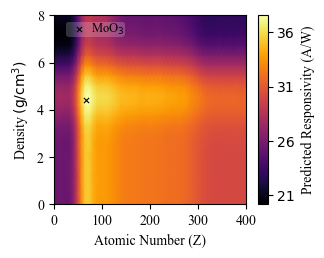

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from sklearn.preprocessing import StandardScaler
import warnings
from matplotlib.font_manager import FontProperties

# Suppress all warnings
warnings.filterwarnings("ignore")

# Generate a coarser grid for predictions
x_values_coarse = np.linspace(0, 400, 20)
y_values_coarse = np.linspace(0, 8, 8)
X_coarse, Y_coarse = np.meshgrid(x_values_coarse, y_values_coarse)
Z_coarse = np.zeros_like(X_coarse)

# Define the fixed part of the data, excluding the x and y variables
fixed_data = [66, 16.5, 3000, 4.42, 6, 107857.3, 3.2, 3.16, 168, 1.1, 13.5, 1769, 0.001]

# Initialize the scaler and fit on the training data
scaler = StandardScaler()
scaler.fit(X_train)  # Fit scaler on the training data

# Loop through the coarse grid and predict
for i in range(X_coarse.shape[0]):
    for j in range(X_coarse.shape[1]):
        # Create the new data with x and y substituted in their respective positions
        new_data = fixed_data.copy()
        new_data[0] = X_coarse[i, j]  # Replace with the x value
        new_data[3] = Y_coarse[i, j]  # Replace with the y value
        new_data_df = pd.DataFrame([new_data], columns=X_train.columns)
        
        # Apply scaling to the new data
        new_data_scaled = scaler.transform(new_data_df)
        
        # Make the prediction
        Z_coarse[i, j] = etr_model.predict(new_data_scaled)[0]

# Flatten the coarse grid for interpolation
points = np.array([X_coarse.ravel(), Y_coarse.ravel()]).T
values = Z_coarse.ravel()

# Create a finer grid for interpolation
x_values_fine = np.linspace(0, 400, 50)
y_values_fine = np.linspace(0, 8, 20)
X_fine, Y_fine = np.meshgrid(x_values_fine, y_values_fine)

# Interpolate to the finer grid
Z_fine = griddata(points, values, (X_fine, Y_fine), method='cubic')

# Plotting
#plt.figure(figsize=((2.26, 1.78)))  # Control over figure size
plt.figure(figsize=((3.33, 2.68)))  # Control over figure size

# Create a smooth heatmap plot using pcolormesh
plt.pcolormesh(X_fine, Y_fine, Z_fine, shading='gouraud', cmap='inferno')

# Add colorbar and set label with Times New Roman font
cbar = plt.colorbar()
cbar.set_label('Predicted Responsivity (A/W)', fontname='Times New Roman', fontsize=10)
cbar.ax.tick_params(labelsize=10)
cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x+1)))  # Display colorbar ticks as integers

# Customize ticks and labels for Times New Roman font
plt.xticks(fontsize=10, fontname='Times New Roman')
plt.yticks(fontsize=10, fontname='Times New Roman')
plt.xlabel('Atomic Number (Z)', fontname='Times New Roman', fontsize=10)
plt.ylabel(r'Density $\mathrm{(g/cm^3)}$', fontname='Times New Roman', fontsize=10)

# Scatter point with a thin cross marker and label for MoO₃
plt.scatter(66, 4.42, color='black', marker='x', s=14, linewidths=0.8, label=r'MoO$_3$')

# Set custom font properties for the legend entry
legend_font = FontProperties(family='Times New Roman', size=9)

# Manually adjust the legend properties for a tight and small display
legend = plt.legend(
    loc='upper right',                # Position of legend
    bbox_to_anchor=(0.4, 1),          # Anchor point to keep it within the plot
    prop=legend_font,                 # Set custom font properties
    handletextpad=0,                  # Space between legend marker and text
    labelspacing=0,                   # Space between entries in the legend
    borderpad=0,                      # Padding between the legend text and the edge of the legend box
    frameon=True                      # Turn on frame
)

# Customize the frame around the legend to make it tight
legend.get_frame().set_linewidth(0)   # Thin frame
legend.get_frame().set_edgecolor("white")  # Frame color
legend.get_frame().set_alpha(0.2)     # Make the legend box slightly transparent

# Apply tight layout for a clean look
plt.tight_layout()
# Display the plot
plt.show()

Thickness vs AL BandGap

In [82]:
x_values_coarse = np.logspace(0, 3, 100)
y_values_coarse = np.linspace(0, 10, 20)

# Create a finer grid for interpolation
x_values_fine = np.logspace(0, 3, 500)
y_values_fine = np.linspace(0, 10, 100)

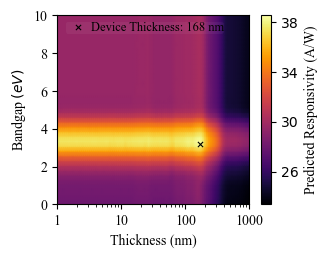

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from scipy.interpolate import griddata
from sklearn.preprocessing import StandardScaler
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Generate a coarser grid for predictions
x_values_coarse = np.logspace(0, 3, 50)
y_values_coarse = np.linspace(0, 10, 20)
X_coarse, Y_coarse = np.meshgrid(x_values_coarse, y_values_coarse)
Z_coarse = np.zeros_like(X_coarse)

# Define the fixed part of the data, excluding the x and y variables
fixed_data = [66, 16.5, 3000, 4.42, 6, 107857.3, 3.2, 3.16, 168, 1.1, 13.5, 1769, 0.001]

# Initialize the scaler and fit on the training data
scaler = StandardScaler()
scaler.fit(X_train)  # Fit scaler on the training data

# Loop through the coarse grid and predict
for i in range(X_coarse.shape[0]):
    for j in range(X_coarse.shape[1]):
        # Create the new data with x and y substituted in their respective positions
        new_data = fixed_data.copy()
        new_data[8] = X_coarse[i, j]  # Replace with the x value
        new_data[6] = Y_coarse[i, j]  # Replace with the y value
        new_data_df = pd.DataFrame([new_data], columns=X_train.columns)
        
        # Apply scaling to the new data
        new_data_scaled = scaler.transform(new_data_df)
        
        # Make the prediction
        Z_coarse[i, j] = etr_model.predict(new_data_scaled)[0]

# Flatten the coarse grid for interpolation
points = np.array([X_coarse.ravel(), Y_coarse.ravel()]).T
values = Z_coarse.ravel()

# Create a finer grid for interpolation
x_values_fine = np.logspace(0, 3, 100)
y_values_fine = np.linspace(0, 10, 40)
X_fine, Y_fine = np.meshgrid(x_values_fine, y_values_fine)

# Interpolate to the finer grid
Z_fine = griddata(points, values, (X_fine, Y_fine), method='cubic')

# Plotting
#plt.figure(figsize=(2.6, 2))  # Control over figure size
#plt.figure(figsize=((2.54, 2.02)))  # Control over figure size
plt.figure(figsize=((3.36, 2.68)))
# Create a smooth heatmap plot using pcolormesh
plt.pcolormesh(X_fine, Y_fine, Z_fine, shading='gouraud', cmap='inferno')

# Add colorbar and set label with Times New Roman font
cbar = plt.colorbar()
cbar.set_label('Predicted Responsivity (A/W)', fontname='Times New Roman', fontsize=10)
cbar.ax.tick_params(labelsize=10)
cbar.set_ticks([26, 30, 34, 38])  # Set specific ticks for colorbar
cbar.set_ticklabels([26, 30, 34, 38])

# Customize ticks and labels for Times New Roman font
plt.xscale('log')
plt.xticks([1, 10, 100, 1000], labels=['1', '10', '100', '1000'], fontsize=10, fontname='Times New Roman')
plt.yticks([0, 2,4,6,8,10], labels=['0', '2', '4', '6','8','10'], fontsize=10, fontname='Times New Roman')
plt.xlabel('Thickness (nm)', fontname='Times New Roman', fontsize=10)
plt.ylabel(r'Bandgap $(eV)$', fontname='Times New Roman', fontsize=10)

# Scatter point with a thin cross marker for MoO₃
plt.scatter(168, 3.2, color='black', marker='x', s=14, linewidths=0.8, label=r'Device Thickness: 168 nm') #, label=r'MoO$_3$')

# Set custom font properties for the legend entry
legend_font = FontProperties(family='Times New Roman', size=9)

# Manually adjust the legend properties for a tight and small display
legend = plt.legend(
    loc='upper right',                # Position of legend
    bbox_to_anchor=(0.9, 1),          # Anchor point to keep it within the plot
    prop=legend_font,                 # Set custom font properties
    handletextpad=0,                  # Space between legend marker and text
    labelspacing=0,                   # Space between entries in the legend
    borderpad=0,                      # Padding between the legend text and the edge of the legend box
    frameon=True                      # Turn on frame
)
# Customize the frame around the legend to make it tight
legend.get_frame().set_linewidth(0)   # Thin frame
legend.get_frame().set_edgecolor("white")  # Frame color
legend.get_frame().set_alpha(0.05)     # Make the legend box slightly transparent
# Apply tight layout for a clean look
plt.tight_layout()
# Display the plot
plt.show()

#### 5D Plot ; Chosing Max Features

#### 5-D Plot 

In [44]:
data_points3 = [
[66, 16.5, 3000, 4.42, 6, 107857.3, 3.2, 3.16, 168, 1.1, 13.5, 1769, 0.001], #MoO3
[322, 64.4, 467, 7.32, 5.6, 82236, 0.165, 0.34, 168, 1.1, 13.5, 1769, 0.001], #Bi2Te3
[66, 22, 100, 6.87, 5.33, 140986, 3.6, 0.85, 168, 1.1, 13.5, 1769, 0.001], #SnO2
[36, 18, 45, 6.76, 4, 360757, 3.8, 2.3, 168, 1.1, 13.5, 1769, 0.001], #NiO
[86, 17.2, 200, 5.89, 4.8, 381620, 4.9, 2.4, 168, 1.1, 13.5, 1769, 0.001], #Ga2O3
[38, 12.66, 0.1, 3.86, 5.33, 117296, 2.95, 2.68, 168, 1.1, 13.5, 1769, 0.001], #TiO2
[142, 47.33, 180, 8.66, 6, 242315, 1.64, 1.45, 168, 1.1, 13.5, 1769, 0.001], #WSe2
[118, 39.33, 450, 5.54, 5.33, 175006, 1.35, 0.7, 168, 1.1, 13.5, 1769, 0.001], #SnSe2
[110, 36.66, 90, 6.51, 6, 214837.3, 1.55, 1.3, 168, 1.1, 13.5, 1769, 0.001], #MoSe2
[146, 48.66, 180, 7.23, 6, 78345.82, 1.1, 0.86, 168, 1.1, 13.5, 1769, 0.001], #MoTe2
[66, 33, 55, 4.9, 5, 59066.49, 1.03, 0.9, 168, 1.1, 13.5, 1769, 0.001], #SnS
[260, 21.66, 7000, 4.28, 3.33, 106808.8, 1.5, 1.57, 168, 1.1, 13.5, 1769, 0.001], #CH3NH3PbI3
[6, 6, 100000, 1.83, 4, 38597, 0, 0, 1.5, 1.1, 13.5, 1769, 0.001], #Graphene
[38, 19, 166, 5.7, 4, 364000, 3.3, 0.74, 168, 1.1, 13.5, 1769, 0.001], #ZnO
[106, 35.33, 50, 7.23, 6, 94835, 2.15, 1.26, 168, 1.1, 13.5, 1769, 0.001], #WS2
[74, 24.67, 200, 4.67, 6, 50830, 1.9, 1.2, 168, 1.1, 13.5, 1769, 0.001], #MoS2
[242, 48.4, 13, 5.01, 5.2, 115799, 3.1, 2.88, 168, 1.1, 13.5, 1769, 0.001], #CsPbBr3
[64, 32, 0.15, 5.26, 2, 184584, 3, 0.49, 168, 1.1, 13.5, 1769, 0.001], #CuBr
[204, 40.8, 17, 5.51, 5.6, 141488, 1.21, 0.76, 168, 1.1, 13.5, 1769, 0.001], #Sb2Se3
[214, 42.8, 10, 6.6, 5.6, 75761, 1.52, 1.36, 168, 1.1, 13.5, 1769, 0.001], #Bi2S3
[82, 27.33, 756, 4.17, 5.33, 47958, 2.18, 1.51, 168, 1.1, 13.5, 1769, 0.001], #SnS2
[124, 17.71, 5.8, 6.15, 4.57, 400250, 5.2, 5.06, 168, 1.1, 13.5, 1769, 0.001], # ZnGa2O4
[188, 62.66, 10, 5.7, 6, 130413, 2.2, 2.4, 168, 1.1, 13.5, 1769, 0.001], # PbI2
[186, 62, 60, 5.89, 5.33, 147574, 2.13, 1.64, 168, 1.1, 13.5, 1769, 0.001], # HgI2
[130, 43.33, 1000, 6.28, 3.33, 145370, 1.7, 0.09, 168, 1.1, 13.5, 1769, 0.001], # CdZnTe
[278, 55.6, 2500, 4.62, 5.2, 116542, 2.29, 1.44, 168, 1.1, 13.5, 1769, 0.001], # CsPbBrI2
[83, 41.5, 500, 5.22, 4.5, 194155, 1.25, 0.46, 168, 1.1, 13.5, 1769, 0.001], # InSe
[70, 10, 228, 3.2, 4.57, 254643, 5, 4.25, 168, 1.1, 13.5, 1769, 0.001], # Si3N4
[14, 14, 1400, 2.33, 4, 253620, 1.12, 1.12, 168, 1.1, 13.5, 1769, 0.001] # Si
]
# Corresponding names for each point
point_names3 = [
    r'MoO$_3$',           # MoO3 in LaTeX
    r'Bi$_2$Te$_3$',      # Bi2Te3 in LaTeX
    r'SnO$_2$',           # SnO2 in LaTeX
    r'NiO',               # NiO (no special formatting needed)
    r'Ga$_2$O$_3$',       # Ga2O3 in LaTeX
    r'TiO$_2$',            # TiO2 in LaTeX
    r'WSe$_2$',            # TiO2 in LaTeX
    r'SnSe$_2$',            # SnSe2 in LaTeX
    r'MoSe$_2$',            # MoSe2 in LaTeX
    r'MoTe$_2$',            # MoTe2 in LaTeX
    r'SnS',                # SnS in LaTeX
    r'CH$_3$NH$_3$PbI$_3$', # CH3NH3PbI3 in LaTeX
    r'Graphene', #  Graphene in LaTeX
    r'ZnO', # ZnO in LaTeX
    r'WS$_2$',    # WS2 in LaTeX
    r'MoS$_2$',   # MoS2 in LaTeX
     r'CsPbBr$_3$', # CsPbBr3 in LaTeX
    r'CuBr',      # CuBr in LaTeX
    r'Sb$_2$Se$_3$', # Sb2Se3 in LaTeX
    r'Bi$_2$S$_3$', # Bi2S3 in LaTeX
    r'SnS$_2$',    # SnS2 in LaTeX
    r'ZnGa$_2$O$_4$', # ZnGa2O4 in LaTeX
    r'HgI$_2$', # PbI2 in LaTeX
    r'PbI$_2$', # HgI2 in LaTeX
    r'CdZnTe', # CdZnTe in LaTeX
    r'CsPbBrI$_2$', # CsPbBrI2 in LaTeX
    r'InSe', # InSe in LaTeX
    r'Si$_3$N$_4$', # Si3N4 in LaTeX
    r'Si' # Si in LaTeX
]

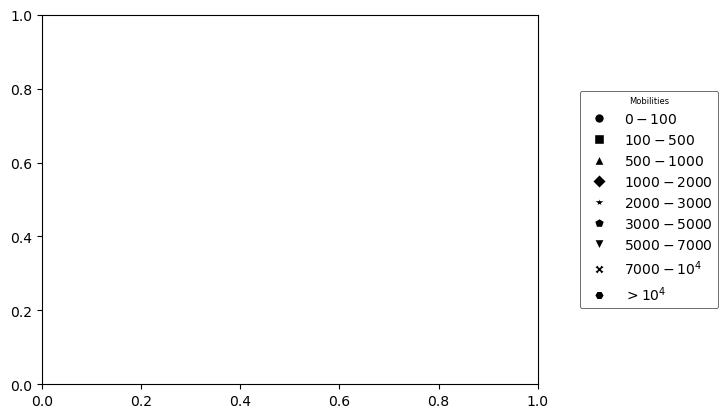

In [45]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# Create a custom legend for marker shapes with mobility ranges
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label=r'$0-100$', markerfacecolor='k', markersize=7),
    plt.Line2D([0], [0], marker='s', color='w', label=r'$100-500$', markerfacecolor='k', markersize=7),
    plt.Line2D([0], [0], marker='^', color='w', label=r'$500-1000$', markerfacecolor='k', markersize=7),
    plt.Line2D([0], [0], marker='D', color='w', label=r'$1000-2000$', markerfacecolor='k', markersize=7),
    plt.Line2D([0], [0], marker='*', color='w', label=r'$2000-3000$', markerfacecolor='k', markersize=9),
    plt.Line2D([0], [0], marker='p', color='w', label=r'$3000-5000$', markerfacecolor='k', markersize=7),
    plt.Line2D([0], [0], marker='v', color='w', label=r'$5000-7000$', markerfacecolor='k', markersize=7),
    plt.Line2D([0], [0], marker='X', color='w', label=r'$7000-10^4$', markerfacecolor='k', markersize=7),
    plt.Line2D([0], [0], marker='H', color='w', label=r'$>10^4$', markerfacecolor='k', markersize=7),
]

# Add the custom legend with small font size and title font size
legend = ax.legend(
    handles=legend_elements,
    title="Mobilities",
    loc='center left',
    bbox_to_anchor=(1.07, 0.5),
    fontsize=4,  # Set the font size for legend text
    title_fontsize=6,  # Set a slightly larger font size for the title if needed
    prop={'family': 'Times New Roman'}
)

# Customize legend frame if needed
legend.get_frame().set_linewidth(0.5)  # Set a thin frame around the legend
legend.get_frame().set_edgecolor("black")  # Optional: Customize edge color of the legend box

In [46]:
# Define marker shapes based on the ranges of Mobility (column 2)
def get_marker_shape(mobility_value):
    if 0 <= mobility_value <= 100:
        return 'o'  # Circle
    elif 100 < mobility_value <= 500:
        return 's'  # Square
    elif 500 < mobility_value <= 1000:
        return '^'  # Triangle
    elif 1000 < mobility_value <= 2000:
        return 'D'  # Diamond
    elif 2000 < mobility_value <= 3000:
        return '*'  # Star
    elif 3000 < mobility_value <= 5000:
        return 'p'  # Pentagon
    elif 5000 < mobility_value <= 7000:
        return 'v'  # Inverted Triangle
    elif 7000 < mobility_value <= 10000:
        return 'X'  # Cross
    else:
        return 'H'  # Hexagon (default for >10000)


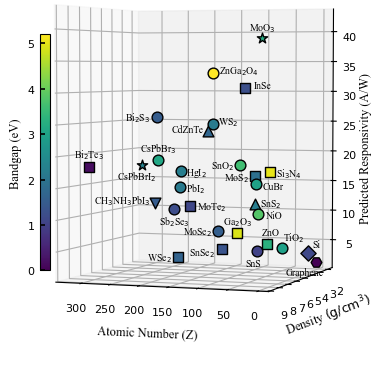

In [47]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from PIL import Image
# Suppress all warnings
warnings.filterwarnings("ignore")
# Convert data points to a DataFrame and scale based on training data
df_data = pd.DataFrame(data_points3, columns=X_train.columns)
scaler = StandardScaler()
scaler.fit(X_train)
df_data_scaled = scaler.transform(df_data)
# Predict responsivity and add to DataFrame
predictions = etr_model.predict(df_data_scaled)
df_data['Predicted Responsivity'] = predictions
# Extract data for plotting
x = df_data.iloc[:, 0]  # Atomic Number (Z)
y = df_data.iloc[:, 3]  # Density
z = df_data['Predicted Responsivity']  # Predicted Responsivity
color = df_data.iloc[:, 6]  # AL_BandGap
# Define initial zero offsets for each label
# Format: (x_offset, y_offset, z_offset) for each point
label_offsets = [
    (0, 0, 1.3),    # MoO3
    (0, 0, 1.6),    # Bi2Te3
    (30, 0, -0.5), # SnO2
    (-26, 0, -0.5),    # NiO (new, using (0, 0, 0))
    (0, 0, 1.5), # Ga2O3
    (-20, 0, 1.2),    # TiO2
    (32, 0, -0.5),  # WSe2
    (35, 0, -1),    # SnSe2 (new, using (0, 0, 0))
    (36, 0, -0.6), # MoSe2
    (-38, 0, -0.5),  # MoTe2
    (7, 0, -2.5),    # SnS
    (52, 0.5, 0), # CH3NH3PbI3
    (20, 0, -2.2),   # Graphene
    (-8, 0, 1.4),    # ZnO (new, using (0, 0, 0))
    (-26, 0, 0),    # WS2
    (32, 0, -0.8),    # MoS2
    (0, 0, 1.5), # CsPbBr3
    (-30, 0, -0.7),    # CuBr (new, using (0, 0, 0))
    (0, 0, -2.5), # Sb2Se3
    (35, 0, -0.5),  # Bi2S3
    (-28, 0, -0.3), # SnS2
    (-45, 0, 0), # ZnGa2O4
    (-27, 0, -0.6),  # PbI2
    (-27, 0, -0.7), # HgI2
    (37, 0, -0.3), # CdZnTe
    (10, 0, -2.5), # CsPbBrI2
    (-30, 0, 0), # InSe 
    (-35, 0, -0.5), # Si3N4 
    (-15, 0, 1) # Si 
]
fig = plt.figure(figsize=(4.33, 7.5))  # Desired figure size
ax = fig.add_subplot(111, projection='3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.0, 1.0, 1.65, 1]))
ax.view_init(elev=4, azim=110)
# Normalize color values for colormap
norm = plt.Normalize(vmin=min(color), vmax=max(color))
cmap = plt.cm.viridis

# Plot data points with customized markers and annotations
for i in range(df_data.shape[0]):
    marker = get_marker_shape(df_data.iloc[i, 2])
    ax.scatter(x[i], y[i], z[i], color=cmap(norm(color[i])), s=60, marker=marker, edgecolor='k')
    
    # Apply initial zero offsets for each label
    x_offset, y_offset, z_offset = label_offsets[i]
    ax.text(x[i] + x_offset, y[i] + y_offset, z[i] + z_offset, point_names3[i],
            fontsize=7, fontname='Times New Roman', color='black', ha='center')

# Set axis labels
ax.set_xlabel('Atomic Number (Z)', fontsize=9, fontname='Times New Roman', labelpad=-2.5)
ax.set_ylabel(r'Density $\mathrm{(g/cm^3)}$', fontsize=9, fontname='Times New Roman', labelpad=-5)

# Manually add the z-axis label as text in the figure
ax.text2D(0.089, -0.014, 'Predicted Responsivity (A/W)', rotation=90, fontsize=9, fontname='Times New Roman')

# Customize tick parameters
ax.tick_params(axis='x', labelsize=8, pad=0, labelcolor='black', direction='in')
ax.tick_params(axis='y', labelsize=8, pad=0, labelcolor='black', direction='in')
ax.tick_params(axis='z', labelsize=8, pad=0, labelcolor='black', direction='in')
ax.set_zlim(min(z) - 1, max(z) + 5)    # Add padding to z-axis limits
# Add color bar with label and tick customization
cax = fig.add_axes([0.155, 0.4, 0.025, 0.315])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cax, label='Active Layer Bandgap (eV)')
cbar.set_label('Bandgap (eV)', fontsize=9, fontname='Times New Roman')
cbar.ax.yaxis.set_label_position("left")
cbar.ax.yaxis.set_ticks_position("left")
cbar.ax.tick_params(labelsize=8, which='both', direction='in', width=1.2)
cbar.ax.yaxis.label.set_family('Times New Roman')
plt.show()

## Decision Tree

In [48]:
from sklearn.tree import DecisionTreeRegressor
# Assuming X_train, X_test, y_train, y_test are already defined
# Optional: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Decision Tree Regressor model with hyperparameter tuning
dt_model = DecisionTreeRegressor(
    criterion='squared_error',     # Function to measure the quality of a split
    splitter='best',               # Strategy used to choose the split at each node
    max_depth=15,                  # Maximum depth of the tree
    min_samples_split=2,           # Minimum number of samples required to split an internal node
    min_samples_leaf=1,            # Minimum number of samples required to be at a leaf node
    max_features=100,           # Number of features to consider when looking for the best split
    min_weight_fraction_leaf=0,  # Minimum weighted fraction of the input samples required to be at a leaf node
    max_leaf_nodes=None,           # Maximum number of leaf nodes
    min_impurity_decrease=0,     # A node will be split if this split induces a decrease in impurity greater than or equal to this value
    ccp_alpha=0.0,                 # Complexity parameter used for Minimal Cost-Complexity Pruning
    random_state=100               # Controls the randomness of the estimator
)
# Train the model
dt_model.fit(X_train_scaled, y_train)

# Make predictions
y_dt_train_pred = dt_model.predict(X_train_scaled)
y_dt_test_pred = dt_model.predict(X_test_scaled)

In [49]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluate the model
dt_train_mse = mean_squared_error(y_train, y_dt_train_pred)
dt_train_rmse = np.sqrt(dt_train_mse)  # Calculate RMSE for training data
dt_train_r2 = r2_score(y_train, y_dt_train_pred)
dt_train_mae = mean_absolute_error(y_train, y_dt_train_pred)

dt_test_mse = mean_squared_error(y_test, y_dt_test_pred)
dt_test_rmse = np.sqrt(dt_test_mse)  # Calculate RMSE for testing data
dt_test_r2 = r2_score(y_test, y_dt_test_pred)
dt_test_mae = mean_absolute_error(y_test, y_dt_test_pred)

# Store results in a DataFrame with RMSE included
dt_results = pd.DataFrame([['Decision Tree', dt_train_mse, dt_train_rmse, dt_train_mae, dt_train_r2, 
                            dt_test_mse, dt_test_rmse, dt_test_mae, dt_test_r2]],
                          columns=['Method', 'Training MSE', 'Training RMSE', 'Training MAE', 'Training R2', 
                                   'Test MSE', 'Test RMSE', 'Test MAE', 'Test R2'])

# Display the results
dt_results


,Method,Training MSE,Training RMSE,Training MAE,Training R2,Test MSE,Test RMSE,Test MAE,Test R2
0,Decision Tree,0.018702,0.136757,0.00981,0.999994,5.345045,2.311935,0.927259,0.998029


In [50]:
# Concatenate results with other models' results
df_models = pd.concat([rf_results, xgb_results, etr_results,dt_results], axis=0)
df_models.reset_index(drop=True, inplace=True)
#print(df_models)
df_models.reset_index(drop=True)

,Method,Training MSE,Training RMSE,Training MAE,Training R2,Test MSE,Test RMSE,Test MAE,Test R2
0,Random Forest,1.147001e+00,1.070981e+00,2.643568e-01,0.999602,4.082231,2.020453,0.642230,0.998495
1,XGBoost,1.653195e+00,1.285766e+00,4.554084e-01,0.999427,6.865474,2.620205,1.038679,0.997468
2,Extra Trees,3.428969e-25,5.855740e-13,2.437562e-13,1.000000,0.807004,0.898334,0.200750,0.999702
3,Decision Tree,1.870241e-02,1.367567e-01,9.810446e-03,0.999994,5.345045,2.311935,0.927259,0.998029


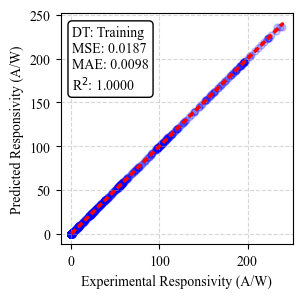

In [51]:
# Create the figure
plt.figure(figsize=(3, 3))

# Scatter plot with controllable dot size
dot_size = 25  # Set the dot size (adjust as needed)
plt.scatter(x=y_train, y=y_dt_train_pred, c="blue", alpha=0.2, s=dot_size)

# Line of best fit
z = np.polyfit(y_train, y_dt_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train), color='red', linestyle=':', linewidth=2.5)  # Custom line style and width

# Labels with custom font properties
plt.ylabel('Predicted Responsivity (A/W)', fontsize=10, fontname='Times New Roman')
plt.xlabel('Experimental Responsivity (A/W)', fontsize=10, fontname='Times New Roman')

# Title with custom font properties
#plt.title('DT: Training', fontsize=12, fontweight='bold', fontname='Times New Roman')

# Customize ticks
plt.xticks(fontsize=10, fontname='Times New Roman', rotation=0)
plt.yticks(fontsize=10, fontname='Times New Roman')

# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add a box with MSE and R² values
textstr = f'DT: Training\nMSE: {dt_train_mse:.4f}\nMAE: {dt_train_mae:.4f}\nR$^2$: {dt_train_r2:.4f}'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props, fontname='Times New Roman')
# Show the plot
plt.show()

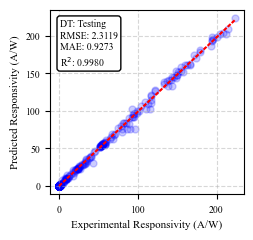

In [52]:
# Create the figure
#plt.figure(figsize=(1.8, 1.8))
plt.figure(figsize=(2.5, 2.4))

# Scatter plot with controllable dot size
dot_size = 25  # Set the dot size (adjust as needed)
plt.scatter(x=y_test, y=y_dt_test_pred, c="blue", alpha=0.2, s=dot_size)

# Line of best fit
z = np.polyfit(y_test, y_dt_test_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red', linestyle=':', linewidth=1.5)  # Custom line style and width

# Labels with custom font properties
plt.ylabel('Predicted Responsivity (A/W)', fontsize=8, fontname='Times New Roman')
plt.xlabel('Experimental Responsivity (A/W)', fontsize=8, fontname='Times New Roman')

# Title with custom font properties
#plt.title('DT: Testing', fontsize=12, fontweight='bold', fontname='Times New Roman')

# Customize ticks
plt.xticks(fontsize=7, fontname='Times New Roman', rotation=0)
plt.yticks(fontsize=7, fontname='Times New Roman')

# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add a box with MSE and R² values
textstr = f'DT: Testing\nRMSE: {dt_test_rmse:.4f}\nMAE: {dt_test_mae:.4f}\nR$^2$: {dt_test_r2:.4f}'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=7,
         verticalalignment='top', bbox=props, fontname='Times New Roman')
# Show the plot
plt.show()

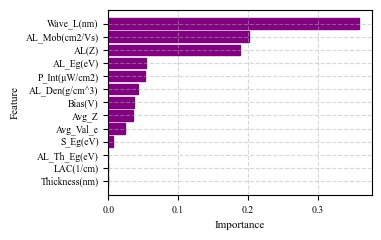

In [53]:
# Feature importance
feature_importances = dt_model.feature_importances_
features = X_train.columns  # Use the actual feature names from your DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

#print("\nFeature Importances:\n", importance_df)

# Plot feature importances with customizations
#plt.figure(figsize=(2.2, 1.8))
plt.figure(figsize=(3.4, 2.4))

# Customize font properties
font_props = font_manager.FontProperties(family='Times New Roman', size=8, weight='bold')

# Plot the bars
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color='purple')

# Customize the bar colors (you can set different colors for each bar if needed)
for bar in bars:
    bar.set_color('purple')

# Set font properties for labels
plt.xlabel('Importance', fontsize=8, fontname='Times New Roman')
plt.ylabel('Feature', fontsize=8, fontname='Times New Roman')
plt.grid(True, linestyle='--', alpha=0.5)

# Customize x-tick values
plt.xticks([0, 0.1, 0.2, 0.3], fontsize=7, fontname='Times New Roman', color='black')
plt.yticks(fontsize=7, fontname='Times New Roman', color='black')

# Invert y-axis to have the most important feature at the top
plt.gca().invert_yaxis()
# Show the plot
plt.show()


## Cat Boost

In [54]:
#pip install catboost

In [55]:
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Optional: Standardize the features
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

# Create the CatBoost Regressor model
catboost_model = CatBoostRegressor(iterations=2000, learning_rate=0.09, depth=8, l2_leaf_reg=3, subsample=0.1,max_leaves=31, random_seed=100, verbose=0)

# Train the model
catboost_model.fit(X_train1, y_train)

# Make predictions
y_catboost_train_pred = catboost_model.predict(X_train1)
y_catboost_test_pred = catboost_model.predict(X_test1)

In [56]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluate the model
catboost_train_mse = mean_squared_error(y_train, y_catboost_train_pred)
catboost_train_rmse = np.sqrt(catboost_train_mse)  # Calculate RMSE for training data
catboost_train_r2 = r2_score(y_train, y_catboost_train_pred)
catboost_train_mae = mean_absolute_error(y_train, y_catboost_train_pred)

catboost_test_mse = mean_squared_error(y_test, y_catboost_test_pred)
catboost_test_rmse = np.sqrt(catboost_test_mse)  # Calculate RMSE for testing data
catboost_test_r2 = r2_score(y_test, y_catboost_test_pred)
catboost_test_mae = mean_absolute_error(y_test, y_catboost_test_pred)

# Store results in a DataFrame with RMSE included
catboost_results = pd.DataFrame([['CatBoost', catboost_train_mse, catboost_train_rmse, catboost_train_mae, catboost_train_r2, 
                                  catboost_test_mse, catboost_test_rmse, catboost_test_mae, catboost_test_r2]],
                                columns=['Method', 'Training MSE', 'Training RMSE', 'Training MAE', 'Training R2', 
                                         'Test MSE', 'Test RMSE', 'Test MAE', 'Test R2'])

# Display the results
catboost_results


,Method,Training MSE,Training RMSE,Training MAE,Training R2,Test MSE,Test RMSE,Test MAE,Test R2
0,CatBoost,0.583694,0.763999,0.401752,0.999798,4.192438,2.047544,0.95118,0.998454


In [57]:
# Concatenate results with other models' results
df_models = pd.concat([rf_results, xgb_results, etr_results,dt_results,
catboost_results], axis=0)
df_models.reset_index(drop=True, inplace=True)
#print(df_models)
df_models.reset_index(drop=True)

,Method,Training MSE,Training RMSE,Training MAE,Training R2,Test MSE,Test RMSE,Test MAE,Test R2
0,Random Forest,1.147001e+00,1.070981e+00,2.643568e-01,0.999602,4.082231,2.020453,0.642230,0.998495
1,XGBoost,1.653195e+00,1.285766e+00,4.554084e-01,0.999427,6.865474,2.620205,1.038679,0.997468
2,Extra Trees,3.428969e-25,5.855740e-13,2.437562e-13,1.000000,0.807004,0.898334,0.200750,0.999702
3,Decision Tree,1.870241e-02,1.367567e-01,9.810446e-03,0.999994,5.345045,2.311935,0.927259,0.998029
4,CatBoost,5.836943e-01,7.639989e-01,4.017520e-01,0.999798,4.192438,2.047544,0.951180,0.998454


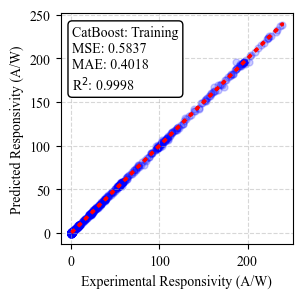

In [58]:
# Create the figure
plt.figure(figsize=(3, 3))

# Scatter plot with controllable dot size
dot_size = 25  # Set the dot size (adjust as needed)
plt.scatter(x=y_train, y=y_catboost_train_pred, c="blue", alpha=0.2, s=dot_size)

# Line of best fit
z = np.polyfit(y_train, y_catboost_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train), color='red', linestyle=':', linewidth=2.5)  # Custom line style and width

# Labels with custom font properties
plt.ylabel('Predicted Responsivity (A/W)', fontsize=10, fontname='Times New Roman')
plt.xlabel('Experimental Responsivity (A/W)', fontsize=10, fontname='Times New Roman')

# Title with custom font properties
#plt.title('CatBoost: Training', fontsize=12, fontweight='bold', fontname='Times New Roman')

# Customize ticks
plt.xticks(fontsize=10, fontname='Times New Roman', rotation=0)
plt.yticks(fontsize=10, fontname='Times New Roman')

# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add a box with MSE and R² values
textstr = f'CatBoost: Training\nMSE: {catboost_train_mse:.4f}\nMAE: {catboost_train_mae:.4f}\nR$^2$: {catboost_train_r2:.4f}'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props, fontname='Times New Roman')
# Show the plot
plt.show()

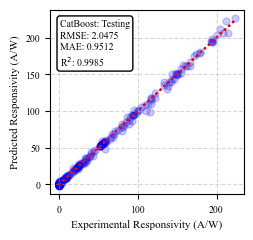

In [59]:
# Create the figure
#plt.figure(figsize=(1.8, 1.8))
plt.figure(figsize=(2.5, 2.4))

# Scatter plot with controllable dot size
dot_size = 25  # Set the dot size (adjust as needed)
plt.scatter(x=y_test, y=y_catboost_test_pred, c="blue", alpha=0.2, s=dot_size)

# Line of best fit
z = np.polyfit(y_test, y_catboost_test_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red', linestyle=':', linewidth=1.5)  # Custom line style and width

# Labels with custom font properties
plt.ylabel('Predicted Responsivity (A/W)', fontsize=8, fontname='Times New Roman')
plt.xlabel('Experimental Responsivity (A/W)', fontsize=8, fontname='Times New Roman')

# Title with custom font properties
#plt.title('CatBoost: Testing', fontsize=12, fontweight='bold', fontname='Times New Roman')

# Customize ticks
plt.xticks(fontsize=7, fontname='Times New Roman', rotation=0)
plt.yticks(fontsize=7, fontname='Times New Roman')

# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add a box with MSE and R² values
textstr = f'CatBoost: Testing\nRMSE: {catboost_test_rmse:.4f}\nMAE: {catboost_test_mae:.4f}\nR$^2$: {catboost_test_r2:.4f}'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=7,
         verticalalignment='top', bbox=props, fontname='Times New Roman')
# Show the plot
plt.show()

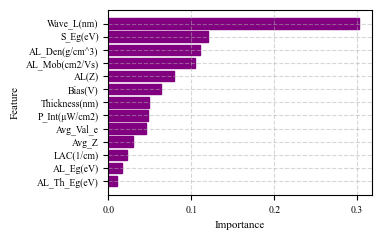

In [60]:
from matplotlib import font_manager
# Feature importance
# Get raw feature importances
feature_importances = catboost_model.feature_importances_
features = X_train.columns

# Normalize so that the importances sum to 1
feature_importances_normalized = feature_importances / np.sum(feature_importances)

features = X_train.columns  # Use the actual feature names from your DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances_normalized
}).sort_values(by='Importance', ascending=False)

#print("\nFeature Importances:\n", importance_df)

# Plot feature importances with customizations
#plt.figure(figsize=(2.2, 1.8))
plt.figure(figsize=(3.4, 2.4))

# Customize font properties
font_props = font_manager.FontProperties(family='Times New Roman', size=8, weight='bold')

# Plot the bars
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color='purple')

# Customize the bar colors (you can set different colors for each bar if needed)
for bar in bars:
    bar.set_color('purple')

# Set font properties for labels
plt.xlabel('Importance', fontsize=8, fontname='Times New Roman')
plt.ylabel('Feature', fontsize=8, fontname='Times New Roman')
plt.grid(True, linestyle='--', alpha=0.5)

# Customize x-tick values
plt.xticks(fontsize=7, fontname='Times New Roman', color='black')
plt.yticks(fontsize=7, fontname='Times New Roman', color='black')

# Invert y-axis to have the most important feature at the top
plt.gca().invert_yaxis()
# Show the plot
plt.show()


## LightGBM 

In [61]:
#pip install lightgbm

In [62]:
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Optional: Standardize the features
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

# Create the LightGBM Regressor model
lgbm_model = lgb.LGBMRegressor(n_estimators=3000, learning_rate=0.15, max_depth=10, subsample=1,
                               colsample_bytree=1, reg_alpha=0, random_state=100)
# Train the model
lgbm_model.fit(X_train1, y_train)
# Make predictions
y_lgbm_train_pred = lgbm_model.predict(X_train1)
y_lgbm_test_pred = lgbm_model.predict(X_test1)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 978, number of used features: 13
[LightGBM] [Info] Start training from score 30.912309
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [63]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluate the model
lgbm_train_mse = mean_squared_error(y_train, y_lgbm_train_pred)
lgbm_train_rmse = np.sqrt(lgbm_train_mse)  # Calculate RMSE for training data
lgbm_train_r2 = r2_score(y_train, y_lgbm_train_pred)
lgbm_train_mae = mean_absolute_error(y_train, y_lgbm_train_pred)

lgbm_test_mse = mean_squared_error(y_test, y_lgbm_test_pred)
lgbm_test_rmse = np.sqrt(lgbm_test_mse)  # Calculate RMSE for testing data
lgbm_test_r2 = r2_score(y_test, y_lgbm_test_pred)
lgbm_test_mae = mean_absolute_error(y_test, y_lgbm_test_pred)

# Store results in a DataFrame with RMSE included
lgbm_results = pd.DataFrame([['LightGBM', lgbm_train_mse, lgbm_train_rmse, lgbm_train_mae, lgbm_train_r2, 
                              lgbm_test_mse, lgbm_test_rmse, lgbm_test_mae, lgbm_test_r2]],
                            columns=['Method', 'Training MSE', 'Training RMSE', 'Training MAE', 'Training R2', 
                                     'Test MSE', 'Test RMSE', 'Test MAE', 'Test R2'])

# Display the results
lgbm_results


,Method,Training MSE,Training RMSE,Training MAE,Training R2,Test MSE,Test RMSE,Test MAE,Test R2
0,LightGBM,1.268283,1.126181,0.389301,0.99956,7.68007,2.771294,1.265125,0.997168


In [64]:
# Concatenate results with other models' results
df_models = pd.concat([rf_results, xgb_results, etr_results,dt_results,
catboost_results,lgbm_results], axis=0)
df_models.reset_index(drop=True, inplace=True)
#print(df_models)
df_models.reset_index(drop=True)

,Method,Training MSE,Training RMSE,Training MAE,Training R2,Test MSE,Test RMSE,Test MAE,Test R2
0,Random Forest,1.147001e+00,1.070981e+00,2.643568e-01,0.999602,4.082231,2.020453,0.642230,0.998495
1,XGBoost,1.653195e+00,1.285766e+00,4.554084e-01,0.999427,6.865474,2.620205,1.038679,0.997468
2,Extra Trees,3.428969e-25,5.855740e-13,2.437562e-13,1.000000,0.807004,0.898334,0.200750,0.999702
3,Decision Tree,1.870241e-02,1.367567e-01,9.810446e-03,0.999994,5.345045,2.311935,0.927259,0.998029
4,CatBoost,5.836943e-01,7.639989e-01,4.017520e-01,0.999798,4.192438,2.047544,0.951180,0.998454
5,LightGBM,1.268283e+00,1.126181e+00,3.893011e-01,0.999560,7.680070,2.771294,1.265125,0.997168


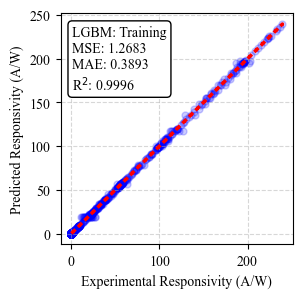

In [65]:
# Create the figure
plt.figure(figsize=(3, 3))

# Scatter plot with controllable dot size
dot_size = 25  # Set the dot size (adjust as needed)
plt.scatter(x=y_train, y=y_lgbm_train_pred, c="blue", alpha=0.2, s=dot_size)

# Line of best fit
z = np.polyfit(y_train, y_lgbm_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train), color='red', linestyle=':', linewidth=2.5)  # Custom line style and width

# Labels with custom font properties
plt.ylabel('Predicted Responsivity (A/W)', fontsize=10, fontname='Times New Roman')
plt.xlabel('Experimental Responsivity (A/W)', fontsize=10, fontname='Times New Roman')

# Title with custom font properties
#plt.title('LGBM: Training', fontsize=12, fontweight='bold', fontname='Times New Roman')

# Customize ticks
plt.xticks(fontsize=10, fontname='Times New Roman', rotation=0)
plt.yticks(fontsize=10, fontname='Times New Roman')

# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add a box with MSE and R² values
textstr = f'LGBM: Training\nMSE: {lgbm_train_mse:.4f}\nMAE: {lgbm_train_mae:.4f}\nR$^2$: {lgbm_train_r2:.4f}'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props, fontname='Times New Roman')
# Show the plot
plt.show()

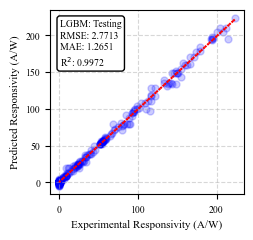

In [66]:
# Create the figure
# plt.figure(figsize=(1.8, 1.8))
plt.figure(figsize=(2.5, 2.4))
# Scatter plot with controllable dot size
dot_size = 25  # Set the dot size (adjust as needed)
plt.scatter(x=y_test, y=y_lgbm_test_pred, c="blue", alpha=0.2, s=dot_size)

# Line of best fit
z = np.polyfit(y_test, y_lgbm_test_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red', linestyle=':', linewidth=1.5)  # Custom line style and width

# Labels with custom font properties
plt.ylabel('Predicted Responsivity (A/W)', fontsize=8, fontname='Times New Roman')
plt.xlabel('Experimental Responsivity (A/W)', fontsize=8, fontname='Times New Roman')

# Title with custom font properties
#plt.title('LGBM: Testing', fontsize=12, fontweight='bold', fontname='Times New Roman')

# Customize ticks
plt.xticks(fontsize=7, fontname='Times New Roman', rotation=0)
plt.yticks(fontsize=7, fontname='Times New Roman')

# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add a box with MSE and R² values
textstr = f'LGBM: Testing\nRMSE: {lgbm_test_rmse:.4f}\nMAE: {lgbm_test_mae:.4f}\nR$^2$: {lgbm_test_r2:.4f}'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=7,
         verticalalignment='top', bbox=props, fontname='Times New Roman')
# Show the plot
plt.show()

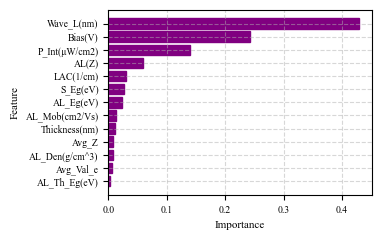

In [67]:
# Feature importance
feature_importances = lgbm_model.feature_importances_

# Normalize so that the importances sum to 1
feature_importances_normalized = feature_importances / np.sum(feature_importances)

features = X_train.columns  # Use the actual feature names from your DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances_normalized
}).sort_values(by='Importance', ascending=False)

#print("\nFeature Importances:\n", importance_df)

# Plot feature importances with customizations
# plt.figure(figsize=(2.2, 1.8))
plt.figure(figsize=(3.4, 2.4))

# Customize font properties
font_props = font_manager.FontProperties(family='Times New Roman', size=8, weight='bold')

# Plot the bars
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color='purple')

# Customize the bar colors (you can set different colors for each bar if needed)
for bar in bars:
    bar.set_color('purple')

# Set font properties for labels
plt.xlabel('Importance', fontsize=8, fontname='Times New Roman')
plt.ylabel('Feature', fontsize=8, fontname='Times New Roman')
plt.grid(True, linestyle='--', alpha=0.5)

# Customize x-tick values
plt.xticks([0, 0.1, 0.2,0.3,0.4], fontsize=7, fontname='Times New Roman', color='black')
plt.yticks(fontsize=7, fontname='Times New Roman', color='black')

# Invert y-axis to have the most important feature at the top
plt.gca().invert_yaxis()
# Show the plot
plt.show()


## SGBoost

In [68]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Optional: Standardize the features
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

# Create the Stochastic Gradient Boosting Regressor model
sgb_model = GradientBoostingRegressor(n_estimators=3100, learning_rate=0.02, max_depth=20, subsample=0.3, random_state=100)

# Train the model
sgb_model.fit(X_train1, y_train)

GradientBoostingRegressor(learning_rate=0.02, max_depth=20, n_estimators=3100,
                          random_state=100, subsample=0.3)

In [70]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions
y_sgb_train_pred = sgb_model.predict(X_train1)
y_sgb_test_pred = sgb_model.predict(X_test1)

# Evaluate the model
sgb_train_mse = mean_squared_error(y_train, y_sgb_train_pred)
sgb_train_rmse = np.sqrt(sgb_train_mse)  # Calculate RMSE for training data
sgb_train_r2 = r2_score(y_train, y_sgb_train_pred)
sgb_train_mae = mean_absolute_error(y_train, y_sgb_train_pred)

sgb_test_mse = mean_squared_error(y_test, y_sgb_test_pred)
sgb_test_rmse = np.sqrt(sgb_test_mse)  # Calculate RMSE for testing data
sgb_test_r2 = r2_score(y_test, y_sgb_test_pred)
sgb_test_mae = mean_absolute_error(y_test, y_sgb_test_pred)

# Store results in a DataFrame with RMSE included
sgb_results = pd.DataFrame([['SGBoost', sgb_train_mse, sgb_train_rmse, sgb_train_mae, sgb_train_r2, 
                             sgb_test_mse, sgb_test_rmse, sgb_test_mae, sgb_test_r2]],
                           columns=['Method', 'Training MSE', 'Training RMSE', 'Training MAE', 'Training R2', 
                                    'Test MSE', 'Test RMSE', 'Test MAE', 'Test R2'])
# Display the results
sgb_results

,Method,Training MSE,Training RMSE,Training MAE,Training R2,Test MSE,Test RMSE,Test MAE,Test R2
0,SGBoost,0.000012,0.003524,0.001538,1.0,1.371225,1.170993,0.424122,0.999494


In [71]:
# Concatenate results with other models' results
df_models = pd.concat([rf_results, xgb_results, etr_results,dt_results,
catboost_results,lgbm_results, sgb_results], axis=0)
df_models.reset_index(drop=True, inplace=True)
#print(df_models)
df_models.reset_index(drop=True)

,Method,Training MSE,Training RMSE,Training MAE,Training R2,Test MSE,Test RMSE,Test MAE,Test R2
0,Random Forest,1.147001e+00,1.070981e+00,2.643568e-01,0.999602,4.082231,2.020453,0.642230,0.998495
1,XGBoost,1.653195e+00,1.285766e+00,4.554084e-01,0.999427,6.865474,2.620205,1.038679,0.997468
2,Extra Trees,3.428969e-25,5.855740e-13,2.437562e-13,1.000000,0.807004,0.898334,0.200750,0.999702
3,Decision Tree,1.870241e-02,1.367567e-01,9.810446e-03,0.999994,5.345045,2.311935,0.927259,0.998029
4,CatBoost,5.836943e-01,7.639989e-01,4.017520e-01,0.999798,4.192438,2.047544,0.951180,0.998454
5,LightGBM,1.268283e+00,1.126181e+00,3.893011e-01,0.999560,7.680070,2.771294,1.265125,0.997168
6,SGBoost,1.242026e-05,3.524239e-03,1.538358e-03,1.000000,1.371225,1.170993,0.424122,0.999494


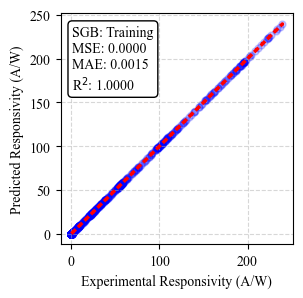

In [72]:
# Create the figure
plt.figure(figsize=(3, 3))

# Scatter plot with controllable dot size
dot_size = 25  # Set the dot size (adjust as needed)
plt.scatter(x=y_train, y=y_sgb_train_pred, c="blue", alpha=0.2, s=dot_size)

# Line of best fit
z = np.polyfit(y_train, y_sgb_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train), color='red', linestyle=':', linewidth=2.5)  # Custom line style and width

# Labels with custom font properties
plt.ylabel('Predicted Responsivity (A/W)', fontsize=10, fontname='Times New Roman')
plt.xlabel('Experimental Responsivity (A/W)', fontsize=10, fontname='Times New Roman')

# Title with custom font properties
#plt.title('SGB: Training', fontsize=12, fontweight='bold', fontname='Times New Roman')

# Customize ticks
plt.xticks(fontsize=10, fontname='Times New Roman', rotation=0)
plt.yticks(fontsize=10, fontname='Times New Roman')

# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add a box with MSE and R² values
textstr = f'SGB: Training\nMSE: {sgb_train_mse:.4f}\nMAE: {sgb_train_mae:.4f}\nR$^2$: {sgb_train_r2:.4f}'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props, fontname='Times New Roman')
# Show the plot
plt.show()

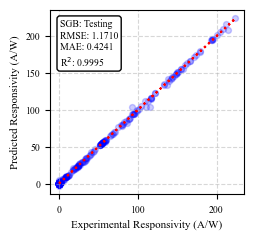

In [73]:
# Create the figure
# plt.figure(figsize=(1.8, 1.8))
plt.figure(figsize=(2.5, 2.4))

# Scatter plot with controllable dot size
dot_size = 18  # Set the dot size (adjust as needed)
plt.scatter(x=y_test, y=y_sgb_test_pred, c="blue", alpha=0.2, s=dot_size)

# Line of best fit
z = np.polyfit(y_test, y_sgb_test_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red', linestyle=':', linewidth=1.5)  # Custom line style and width

# Labels with custom font properties
plt.ylabel('Predicted Responsivity (A/W)', fontsize=8, fontname='Times New Roman')
plt.xlabel('Experimental Responsivity (A/W)', fontsize=8, fontname='Times New Roman')

# Title with custom font properties
#plt.title('SGB: Testing', fontsize=12, fontweight='bold', fontname='Times New Roman')

# Customize ticks
plt.xticks(fontsize=7, fontname='Times New Roman', rotation=0)
plt.yticks(fontsize=7, fontname='Times New Roman')

# Grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add a box with MSE and R² values
textstr = f'SGB: Testing\nRMSE: {sgb_test_rmse:.4f}\nMAE: {sgb_test_mae:.4f}\nR$^2$: {sgb_test_r2:.4f}'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=7,
         verticalalignment='top', bbox=props, fontname='Times New Roman')
# Show the plot
plt.show()

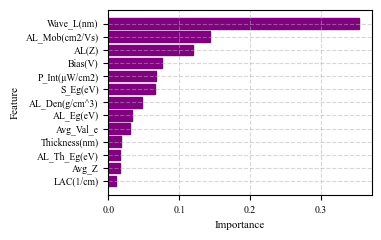

In [74]:
# Feature importance
feature_importances = sgb_model.feature_importances_
features = X_train.columns  # Use the actual feature names from your DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(3.4, 2.4))

# Customize font properties
font_props = font_manager.FontProperties(family='Times New Roman', size=8, weight='bold')

# Plot the bars
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color='purple')

# Customize the bar colors (you can set different colors for each bar if needed)
for bar in bars:
    bar.set_color('purple')

# Set font properties for labels
plt.xlabel('Importance', fontsize=8, fontname='Times New Roman')
plt.ylabel('Feature', fontsize=8, fontname='Times New Roman')
plt.grid(True, linestyle='--', alpha=0.5)

# Customize x-tick values
plt.xticks([0, 0.1, 0.2, 0.3], fontsize=7, fontname='Times New Roman', color='black')
plt.yticks(fontsize=7, fontname='Times New Roman', color='black')

# Invert y-axis to have the most important feature at the top
plt.gca().invert_yaxis()
# Show the plot
plt.show()


# Results Summary from all models

In [84]:
import pandas as pd

# Create results DataFrames for all models
# rf_results, xgb_results, etr_results, dt_results, catboost_results, lgbm_results, sgb_results are already defined

# Concatenate results from different models
df_models = pd.concat([rf_results, xgb_results, etr_results, dt_results,
                       catboost_results, lgbm_results, sgb_results], axis=0)
df_models.reset_index(drop=True, inplace=True)


# Example new data - ensure you match the training data's feature order and names
new_data = pd.DataFrame([[66, 16.5, 3000, 4.42, 6, 107857.3, 3.2, 3.16, 168, 1.1, 13.5, 1769, 0.001]], columns=X_train.columns)
new_data_scaled = scaler.transform(new_data)

# Predict the responsivity using each model
predicted_responsivity = {
    'Random Forest': rf.predict(new_data)[0],
    'XGBoost': xgb_model.predict(new_data_scaled)[0] if 'xgb_model' in locals() else 'Model not defined',
    'Extra Trees': etr_model.predict(new_data_scaled)[0],
    'Decision Tree': dt_model.predict(new_data_scaled)[0],
    'CatBoost':catboost_model.predict(new_data_scaled)[0],
    'LightGBM':lgbm_model.predict(new_data_scaled)[0],
    'SGB':sgb_model.predict(new_data_scaled)[0]
}
# Convert predictions to DataFrame
df_predictions = pd.DataFrame(list(predicted_responsivity.items()), columns=['Method', 'Responsivity'])
# Merge predictions with the models' results
df_models = pd.merge(df_models, df_predictions, on='Method', how='left')

# Ensure the result is correctly ordered
df_models = df_models[['Method', 'Training MSE', 'Training MAE', 'Training R2', 
                       'Test MSE', 'Test MAE', 'Test R2', 'Responsivity']]

# Reset index for clarity
df_models.reset_index(drop=True, inplace=True)

# Display the final DataFrame
print("Final df_models with predictions:")
df_models

Final df_models with predictions:


,Method,Training MSE,Training MAE,Training R2,Test MSE,Test MAE,Test R2,Responsivity
0,Random Forest,1.147001e+00,2.643568e-01,0.999602,4.082231,0.642230,0.998495,15.225760
1,XGBoost,1.653195e+00,4.554084e-01,0.999427,6.865474,1.038679,0.997468,14.942847
2,Extra Trees,3.428969e-25,2.437562e-13,1.000000,0.807004,0.200750,0.999702,38.769316
3,Decision Tree,1.870241e-02,9.810446e-03,0.999994,5.345045,0.927259,0.998029,10.765033
4,CatBoost,5.836943e-01,4.017520e-01,0.999798,4.192438,0.951180,0.998454,28.264210
5,LightGBM,1.268283e+00,3.893011e-01,0.999560,7.680070,1.265125,0.997168,5.760291
6,SGBoost,1.242026e-05,1.538358e-03,1.000000,1.371225,0.424122,0.999494,NaN
